# Mapping Net Visa Changes Across Australia: A Regional Analysis

This study maps visa trends from 2004 to 2024 across different regions in Australia. It examines how visa arrivals and departures have varied over time to reveal regional patterns and trends.

More info at [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/industry/tourism-and-transport/overseas-arrivals-and-departures-australia/latest-release#key-statistics)

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd


In [7]:
import shapely
import fiona
import geopy.distance
from shapely.geometry import Point, Polygon, MultiPolygon

# Arrivals Data 

ARRIVALS DATA: "excel_file_path_ARR" and File - 3401016 Visas ARR

In [8]:
excel_file_path_ARR = "3401016 Visas ARR.xlsx"

travel_data_ARR = pd.read_excel(excel_file_path_ARR, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)

travel_data_ARR.head()

C:\Users\ameli\AppData\Local\Temp\ipykernel_8944\2551079299.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  travel_data_ARR = pd.read_excel(excel_file_path_ARR, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)


Month  Special Category Visa (subclass 444)(e)  Permanent Family Visas  \
0 2004-07-01                                  37390.0                  5170.0   
1 2004-08-01                                  37500.0                  5130.0   
2 2004-09-01                                  36180.0                  4490.0   
3 2004-10-01                                  39900.0                  5170.0   
4 2004-11-01                                  33620.0                  4470.0   

   Permanent Skilled Visas  Permanent Other Visas  Permanent Visas - Total  \
0                   8550.0                 9060.0                  22790.0   
1                   6710.0                 7580.0                  19430.0   
2                   6710.0                 7860.0                  19060.0   
3                   7140.0                 9010.0                  21320.0   
4                   6190.0                 7370.0                  18030.0   

   Temporary Student Visas - Higher Educ.  \
0                                  6850.0   
1                                  2110.0   
2                                  1000.0   
3                                  2040.0   
4                                  1520.0   

   Temporary Student Visas - Vocational Educ. & Training  \
0                                             1860.0       
1                                              870.0       
2                                              800.0       
3                                             1210.0       
4                                              670.0       

   Temporary Student Visas - Schools  \
0                             2550.0   
1                              450.0   
2                              190.0   
3                              830.0   
4                              140.0   

   Temporary Student Visas - Independent ELICOS(f)  \
0                                            880.0   
1                                            460.0   
2                                            790.0   
3                                            890.0   
4                                            470.0   

   Temporary Student Visas - Postgraduate Research  \
0                                           4370.0   
1                                           1080.0   
2                                            580.0   
3                                            480.0   
4                                            440.0   

   Temporary Student Visas - Other Students  Temporary Student Visas - Total  \
0                                    2910.0                          19410.0   
1                                     250.0                           5220.0   
2                                     270.0                           3640.0   
3                                     440.0                           5900.0   
4                                     370.0                           3600.0   

   Temporary Skilled Visas  Temporary Visitor Visas  Temporary Work Visas  \
0                   6020.0                 114880.0                3280.0   
1                   5180.0                 105300.0                4340.0   
2                   4400.0                  97500.0                7390.0   
3                   5600.0                 119060.0                7440.0   
4                   4140.0                 138590.0                7420.0   

   Temporary Other Visas  Temporary visas - Total  Other Visas(g)  Total(h)  
0                 2750.0                 146340.0          1200.0  359890.0  
1                 2750.0                 122780.0           980.0  304160.0  
2                 2710.0                 115640.0           960.0  299870.0  
3                 2380.0                 140380.0          1360.0  373070.0  
4                 2510.0                 156270.0          1810.0  326660.0

In [9]:
excel_file = pd.ExcelFile(excel_file_path_ARR) 
print("Sheet names:", excel_file.sheet_names)

date_format = "%m-%Y"

date_parser = lambda x: pd.to_datetime(x, format=date_format)

excel_file = pd.ExcelFile(excel_file_path_ARR)

print("Sheet names:", excel_file.sheet_names)

sheets = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']
dataframes = {}

for sheet in sheets:
    ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
    ARR_DF.columns = ['Month', 'Special_Category_Visa', 'P_Fam_Visas', 'P_Skilled_Visas', 'P_Other_Visas', 'P_Visas_TOTAL', 'T_Student_Visas_HiEd', 'T_Student_Visas_VET', 'T_Student_Visas_Schools', 'T_Student_Visas_INDP_ELICOS(f)', 'T_Student_Visas_PGrad_Research', 'T_Student_Visas_Other_Students', 'T_Student_Visas_TOTAL', 'T_Skilled_Visas', 'T_Visitor_Visas', 'T_Work_Visas', 'T_Other_Visas', 'T_Visas_TOTAL', 'Other_Visas(g)', 'TOTAL(h)']
    dataframes[sheet] = ARR_DF

for sheet, ARR_DF in dataframes.items():
    print(f"{sheet} data:")
    print(ARR_DF.head(10))

Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']
Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']


C:\Users\ameli\AppData\Local\Temp\ipykernel_8944\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
C:\Users\ameli\AppData\Local\Temp\ipykernel_8944\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
C:\Users\ameli\AppData\Local\Temp\ipykernel_8944\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, she

NSW data:
       Month  Special_Category_Visa  P_Fam_Visas  P_Skilled_Visas  \
0 2004-07-01                37390.0       5170.0           8550.0   
1 2004-08-01                37500.0       5130.0           6710.0   
2 2004-09-01                36180.0       4490.0           6710.0   
3 2004-10-01                39900.0       5170.0           7140.0   
4 2004-11-01                33620.0       4470.0           6190.0   
5 2004-12-01                40660.0       4330.0           5990.0   
6 2005-01-01                41720.0       7430.0          11580.0   
7 2005-02-01                32290.0       5020.0           7630.0   
8 2005-03-01                37620.0       5500.0           7250.0   
9 2005-04-01                36690.0       4990.0           8000.0   

   P_Other_Visas  P_Visas_TOTAL  T_Student_Visas_HiEd  T_Student_Visas_VET  \
0         9060.0        22790.0                6850.0               1860.0   
1         7580.0        19430.0                2110.0                870.0

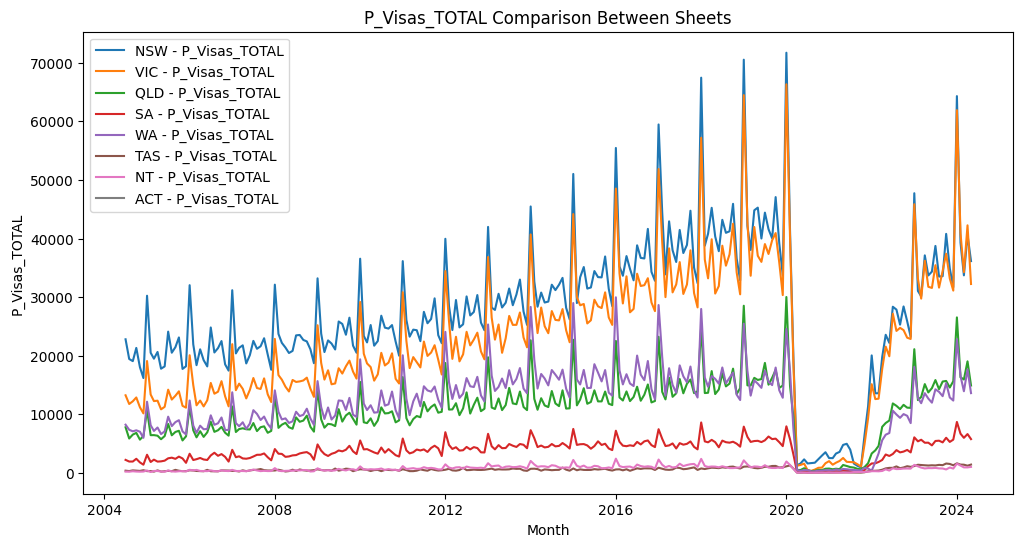

In [10]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'P_Visas_TOTAL' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['P_Visas_TOTAL'] = pd.to_numeric(ARR_DF['P_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['P_Visas_TOTAL'], label=f'{sheet} - P_Visas_TOTAL')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'P_Visas_TOTAL'")

plt.xlabel('Month')
plt.ylabel('P_Visas_TOTAL')
plt.title('P_Visas_TOTAL Comparison Between Sheets')
plt.legend()
plt.show()

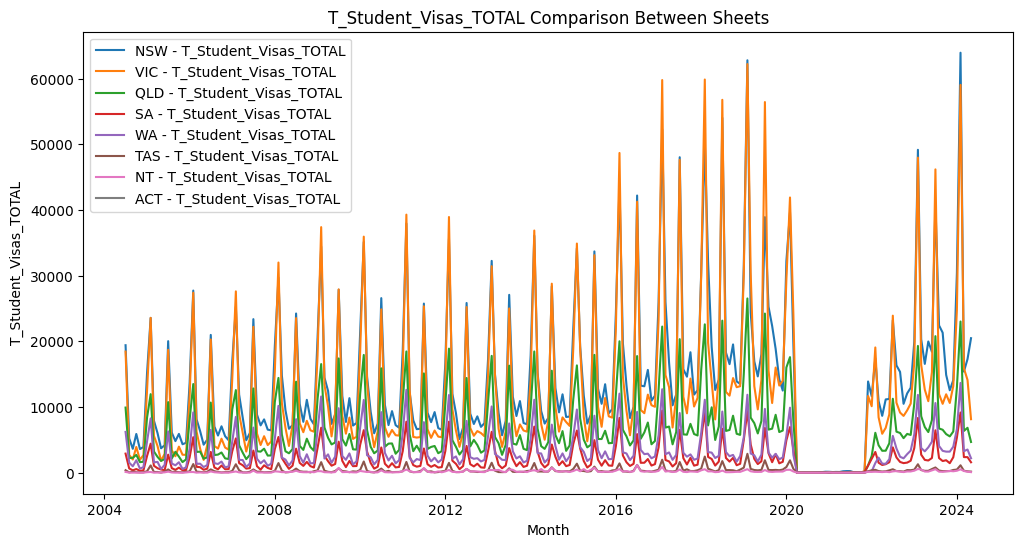

In [11]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'T_Student_Visas_TOTAL' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['T_Student_Visas_TOTAL'] = pd.to_numeric(ARR_DF['T_Student_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['T_Student_Visas_TOTAL'], label=f'{sheet} - T_Student_Visas_TOTAL')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Student_Visas_TOTAL'")

plt.xlabel('Month')
plt.ylabel('T_Student_Visas_TOTAL')
plt.title('T_Student_Visas_TOTAL Comparison Between Sheets')
plt.legend()
plt.show()

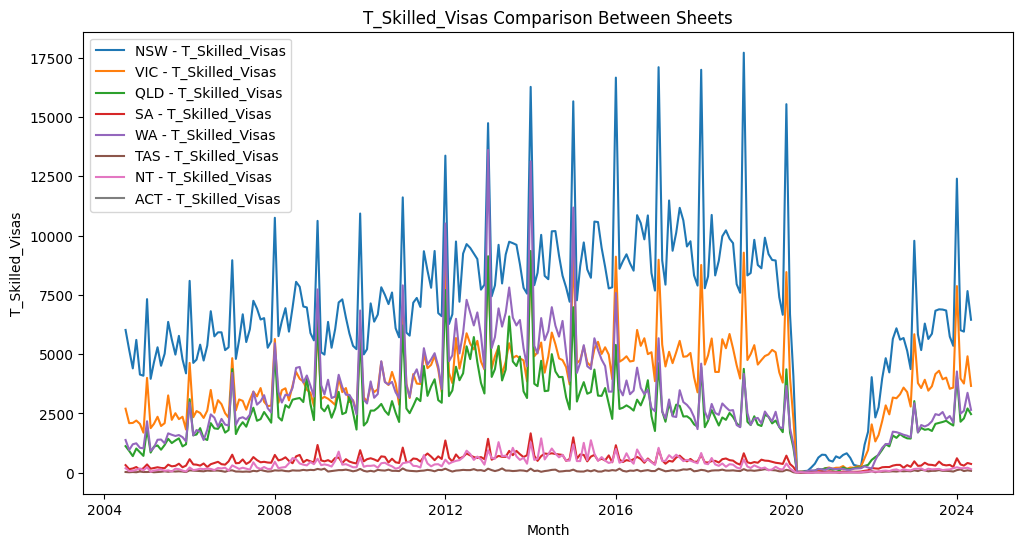

In [12]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'T_Skilled_Visas' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['T_Skilled_Visas'] = pd.to_numeric(ARR_DF['T_Skilled_Visas'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['T_Skilled_Visas'], label=f'{sheet} - T_Skilled_Visas')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Skilled_Visas'")

plt.xlabel('Month')
plt.ylabel('T_Skilled_Visas')
plt.title('T_Skilled_Visas Comparison Between Sheets')
plt.legend()
plt.show()

In [15]:
excel_file_path_DEP = "3401017 Visas DEP.xlsx"
travel_data_DEP = pd.read_excel(excel_file_path_DEP, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)

travel_data_DEP.head()



Month  Special Category Visa (subclass 444)(e)  Permanent Family Visas  \
0 2004-07-01                                  38770.0                  4500.0   
1 2004-08-01                                  37630.0                  3420.0   
2 2004-09-01                                  33670.0                  3640.0   
3 2004-10-01                                  39950.0                  3520.0   
4 2004-11-01                                  32770.0                  4080.0   

   Permanent Skilled Visas  Permanent Other Visas  Permanent Visas - Total  \
0                   5860.0                 7180.0                  17540.0   
1                   5480.0                 7440.0                  16340.0   
2                   5560.0                 8540.0                  17740.0   
3                   5820.0                 6340.0                  15690.0   
4                   6390.0                 6600.0                  17060.0   

   Temporary Student Visas - Higher Educ.  \
0                                  3360.0   
1                                   830.0   
2                                  1290.0   
3                                  1050.0   
4                                  6440.0   

   Temporary Student Visas - Vocational Educ. & Training  \
0                                             1110.0       
1                                              620.0       
2                                              900.0       
3                                              780.0       
4                                              760.0       

   Temporary Student Visas - Schools  \
0                              870.0   
1                              100.0   
2                              670.0   
3                              240.0   
4                             1500.0   

   Temporary Student Visas - Independent ELICOS(f)  \
0                                            440.0   
1                                            290.0   
2                                            380.0   
3                                            180.0   
4                                            160.0   

   Temporary Student Visas - Postgraduate Research  \
0                                           1800.0   
1                                            990.0   
2                                            440.0   
3                                            440.0   
4                                           1800.0   

   Temporary Student Visas - Other Students  Temporary Student Visas - Total  \
0                                    1420.0                           9010.0   
1                                     470.0                           3310.0   
2                                     410.0                           4090.0   
3                                     210.0                           2900.0   
4                                    1280.0                          11940.0   

   Temporary Skilled Visas  Temporary Visitor Visas  Temporary Work Visas  \
0                   5190.0                 101150.0                4240.0   
1                   4050.0                 123840.0                4050.0   
2                   4110.0                  92980.0                3700.0   
3                   3910.0                 116660.0                3010.0   
4                   3910.0                 139990.0                3580.0   

   Temporary Other Visas  Temporary visas - Total  Other Visas(g)  Total(h)  
0                 3600.0                 123190.0          1130.0  318740.0  
1                 2980.0                 138230.0           950.0  313760.0  
2                 2970.0                 107860.0           910.0  313000.0  
3                 2930.0                 129410.0           890.0  305870.0  
4                 3250.0                 162680.0          1630.0  333640.0

This graph shows the distribution of Family Visas within both the Departures and Arrivals categories. 

In [16]:
if 'P_Fam_Visas' in travel_data_ARR.columns and 'Permanent Family Visas' in travel_data_DEP.columns:
    # Optional: Convert columns to numeric if needed
    travel_data_ARR['P_Fam_Visas'] = pd.to_numeric(travel_data_ARR['P_Fam_Visas'], errors='coerce')
    travel_data_DEP['Permanent Family Visas'] = pd.to_numeric(travel_data_DEP['Permanent Family Visas'], errors='coerce')

    # Create the figure
    plt.figure(figsize=(12, 6))

    # Plot histograms for arrivals and departures
    travel_data_ARR['P_Fam_Visas'].plot(kind='hist', bins=30, alpha=0.5, label='Departures', color='red')
    travel_data_DEP['Permanent Family Visas'].plot(kind='hist', bins=30, alpha=0.5, label='Arrivals', color='blue')

    # Adding labels, title, and legend
    plt.legend()
    plt.title('Distribution of Family Visas')
    plt.xlabel('Number of Visas')
    plt.ylabel('Frequency')  # Added y-axis label for clarity

    # Show the plot
    plt.show()
else:
    print("One or both columns are missing or misnamed in the DataFrames.")

One or both columns are missing or misnamed in the DataFrames.


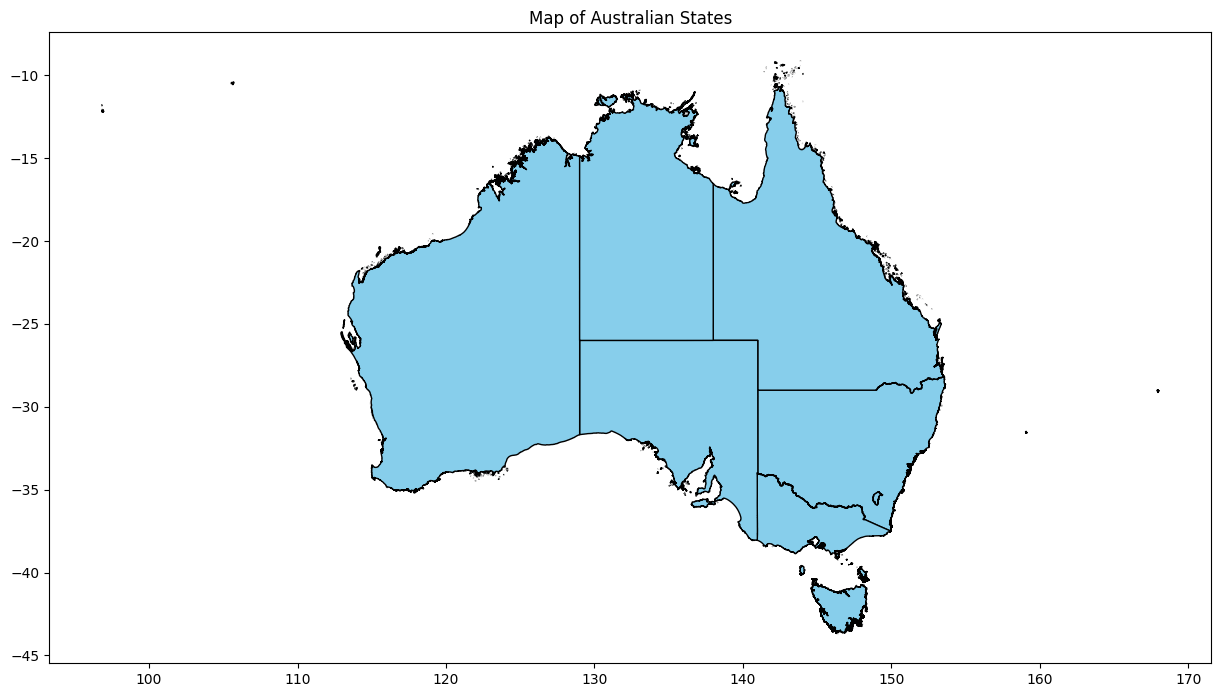

In [97]:
shapefile_path = r"C:\Users\ameli\1161\travel_dataproject\Aus Map Shape.zip"

try:
    gdf = gpd.read_file(shapefile_path)

    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(ax=ax, color='skyblue', edgecolor='black')

    ax.set_title('Map of Australian States')
    plt.show()

except Exception as e:
    print(f"An error occurred while reading the shapefile: {e}")



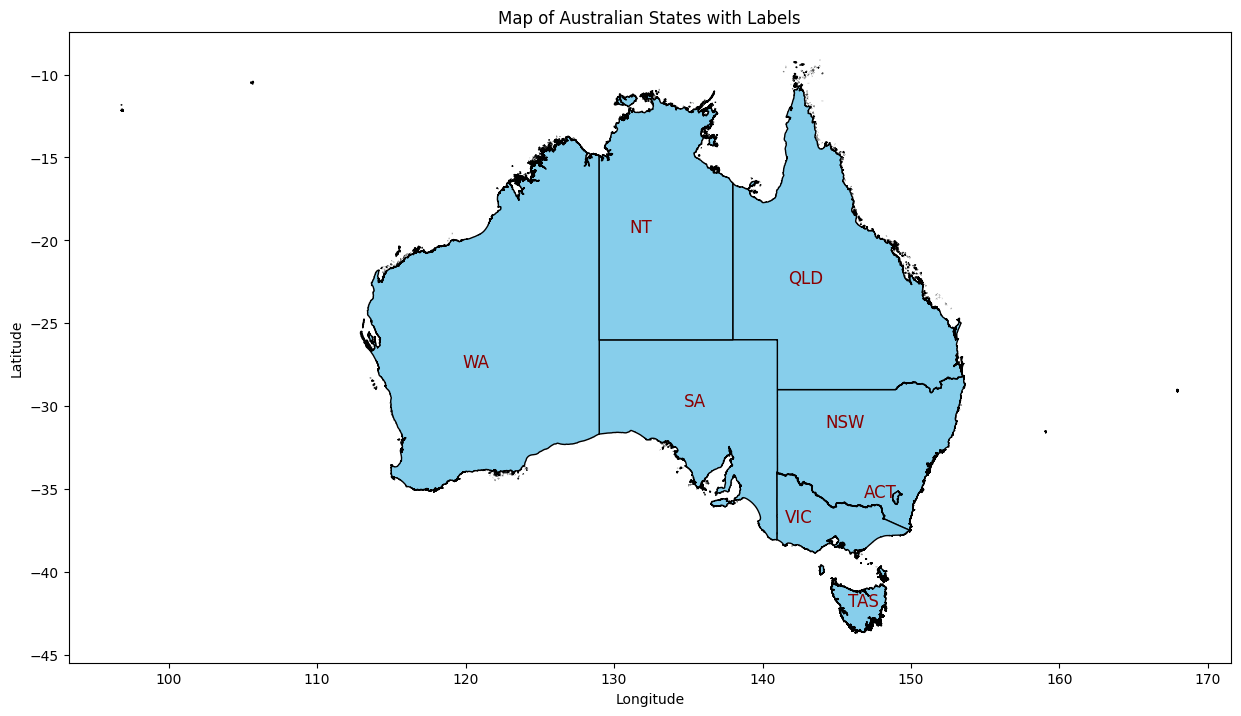

In [165]:
shapefile_path = r"C:\Users\ameli\1161\travel_dataproject\Aus Map Shape.zip"

# Sample data for labels
labels_data = {
    'Location': ['NSW', 'VIC', 'QLD', 'WA', 'SA', 'NT', 'ACT', 'TAS'],
    'Latitude': [-31.2532, -36.9848, -22.5752, -27.6728, -30.0002, -19.4914, -35.4735, -42.0409],
    'Longitude': [146.9211, 143.3906, 144.0848, 121.6283, 136.2092, 132.5510, 149.0124, 147.8087]
}
labels_df = pd.DataFrame(labels_data)

try:
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Ensure data types are correct
    labels_df['Latitude'] = pd.to_numeric(labels_df['Latitude'], errors='coerce')
    labels_df['Longitude'] = pd.to_numeric(labels_df['Longitude'], errors='coerce')

    # Plot the map
    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(ax=ax, color='skyblue', edgecolor='black')

    # Add labels
    for idx, row in labels_df.iterrows():
        ax.text(
            row['Longitude'],   # Longitude value from labels_df
            row['Latitude'],    # Latitude value from labels_df
            row['Location'],    # Location name from labels_df
            fontsize=12,
            ha='right',
            color='darkred'
        )

    # Set plot title and labels
    ax.set_title('Map of Australian States with Labels')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.show()

except Exception as e:
    print(f"An error occurred while reading the shapefile: {e}")

# This next section just shows the sum of the category "Permanent Visas - Total", "Temporary Student Visas - Total" and "Temporary Skilled Visas".  

In [172]:
sheet_names = ['Overall']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Path to your Excel file
excel_file_path_ARR = r"C:\Users\ameli\1161\travel_dataproject\data_introduction\3401016 Visas ARR.xlsx"

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column names
    column_names = [
        'Temporary Student Visas - Higher Educ',
        'Temporary Student Visas - Vocational Educ. & Training',
        'Temporary Student Visas - Schools',
        'Temporary Student Visas - Independent ELICOS(f)',
        'Temporary Student Visas - Postgraduate Research',
        'Temporary Student Visas - Other Students'
    ]  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    # Compute the sum for the specified columns for each row
    df_sum = df.loc[16:254, column_names].sum(axis=1).sum()

    # Store the result in the dictionary
    sums[sheet_name] = df_sum

# Print the results
for sheet_name, total_sum in sums.items():
    print(f"Sum of values in {sheet_name} from row 17 to 255 across specified columns: {total_sum}")

KeyError: "None of [Index(['Temporary Student Visas - Higher Educ',\n       'Temporary Student Visas - Vocational Educ. & Training',\n       'Temporary Student Visas - Schools',\n       'Temporary Student Visas - Independent ELICOS(f)',\n       'Temporary Student Visas - Postgraduate Research',\n       'Temporary Student Visas - Other Students'],\n      dtype='object')] are in the [columns]"

In [146]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Permanent Visas - Total'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

# Print the results
for sheet_name, total_sum in sums.items():
    print(f"Sum of values in {sheet_name} from row 17 to 255 in column '{column_name}': {total_sum}")

Sum of values in VIC from row 17 to 255 in column 'Permanent Visas - Total': 5271090.0
Sum of values in NSW from row 17 to 255 in column 'Permanent Visas - Total': 6289560.0
Sum of values in QLD from row 17 to 255 in column 'Permanent Visas - Total': 2455640.0
Sum of values in WA from row 17 to 255 in column 'Permanent Visas - Total': 2759120.0
Sum of values in SA from row 17 to 255 in column 'Permanent Visas - Total': 880620.0
Sum of values in TAS from row 17 to 255 in column 'Permanent Visas - Total': 130910.0
Sum of values in ACT from row 17 to 255 in column 'Permanent Visas - Total': 238230.0
Sum of values in NT from row 17 to 255 in column 'Permanent Visas - Total': 169200.0


<Figure size 640x480 with 0 Axes>

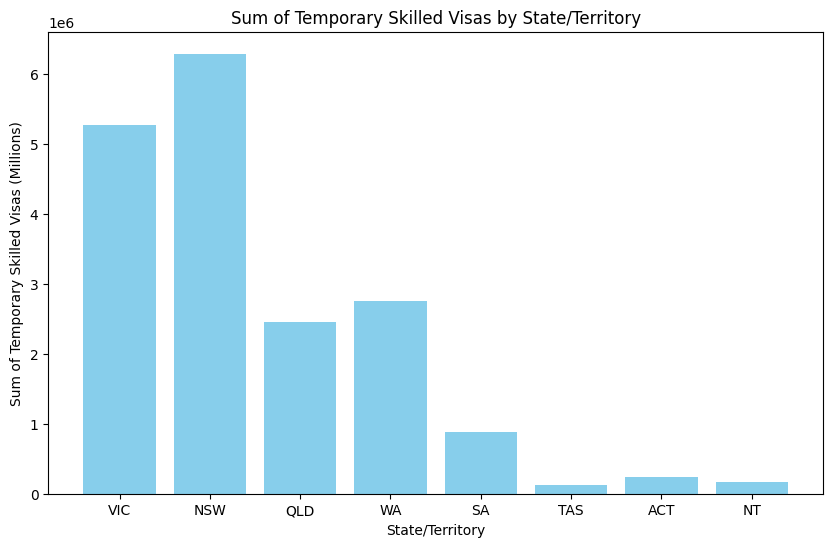

In [158]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [5271090.0, 6289560.0, 2455640.0, 2759120.0, 880620.0, 130910.0, 238230.0, 169200.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Skilled Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Skilled Visas (Millions)')

# Display the plot
plt.show()

In [148]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Temporary Student Visas - Total'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

# Print the results
for sheet_name, total_sum in sums.items():
    print(f"Sum of values in {sheet_name} from row 17 to 255 in column '{column_name}': {total_sum}")

Sum of values in VIC from row 17 to 255 in column 'Temporary Student Visas - Total': 2957140.0
Sum of values in NSW from row 17 to 255 in column 'Temporary Student Visas - Total': 3354840.0
Sum of values in QLD from row 17 to 255 in column 'Temporary Student Visas - Total': 1523570.0
Sum of values in WA from row 17 to 255 in column 'Temporary Student Visas - Total': 766570.0
Sum of values in SA from row 17 to 255 in column 'Temporary Student Visas - Total': 495310.0
Sum of values in TAS from row 17 to 255 in column 'Temporary Student Visas - Total': 84800.0
Sum of values in ACT from row 17 to 255 in column 'Temporary Student Visas - Total': 239360.0
Sum of values in NT from row 17 to 255 in column 'Temporary Student Visas - Total': 42080.0


<Figure size 640x480 with 0 Axes>

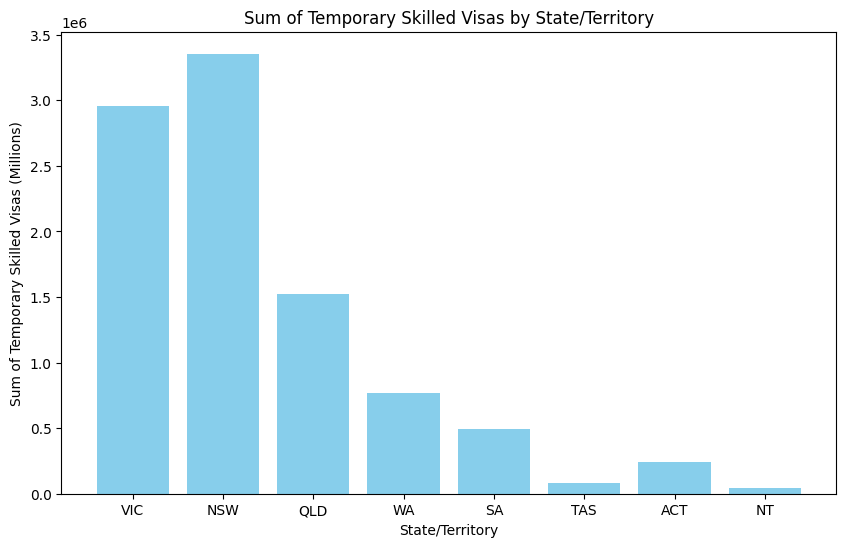

In [157]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [2957140.0, 3354840.0, 1523570.0, 766570.0, 495310.0, 84800.0, 239360.0, 42080.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Skilled Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Skilled Visas (Millions)')

# Display the plot
plt.show()

In [149]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Temporary Skilled Visas'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

# Print the results
for sheet_name, total_sum in sums.items():
    print(f"Sum of values in {sheet_name} from row 17 to 255 in column '{column_name}': {total_sum}")

Sum of values in VIC from row 17 to 255 in column 'Temporary Skilled Visas': 881970.0
Sum of values in NSW from row 17 to 255 in column 'Temporary Skilled Visas': 1607420.0
Sum of values in QLD from row 17 to 255 in column 'Temporary Skilled Visas': 596310.0
Sum of values in WA from row 17 to 255 in column 'Temporary Skilled Visas': 751880.0
Sum of values in SA from row 17 to 255 in column 'Temporary Skilled Visas': 111250.0
Sum of values in TAS from row 17 to 255 in column 'Temporary Skilled Visas': 18270.0
Sum of values in ACT from row 17 to 255 in column 'Temporary Skilled Visas': 46600.0
Sum of values in NT from row 17 to 255 in column 'Temporary Skilled Visas': 82390.0


<Figure size 640x480 with 0 Axes>

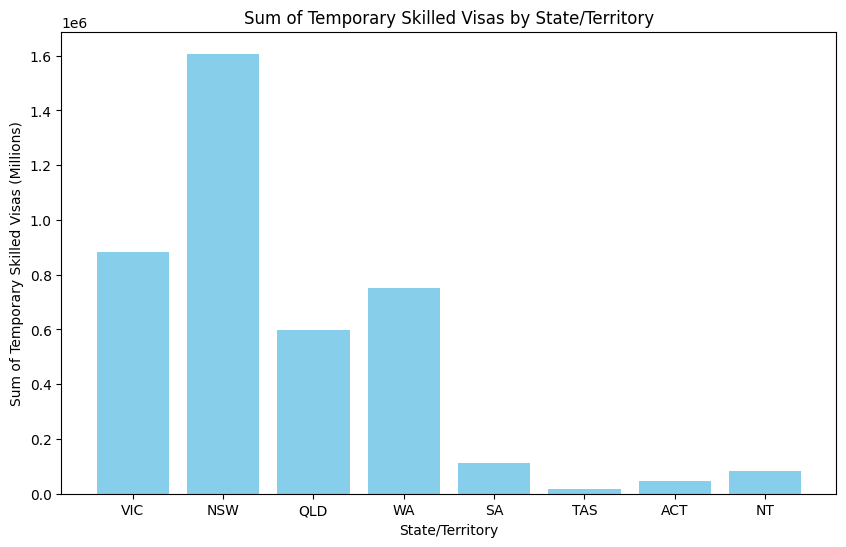

In [159]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [881970.0, 1607420.0, 596310.0, 751880.0, 111250.0, 18270.0, 46600.0, 82390.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Skilled Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Skilled Visas (Millions)')

# Display the plot
plt.show()

In [18]:
tdf = travel_data_ARR[travel_data_ARR.Month > pd.Timestamp(year=2014, month=1, day=1)]
tdf.head()

Month  Special Category Visa (subclass 444)(e)  \
115 2014-02-01                                  37080.0   
116 2014-03-01                                  43530.0   
117 2014-04-01                                  45820.0   
118 2014-05-01                                  39290.0   
119 2014-06-01                                  37870.0   

     Permanent Family Visas  Permanent Skilled Visas  Permanent Other Visas  \
115                  8570.0                  12350.0                11760.0   
116                  8580.0                   9970.0                 9790.0   
117                  8310.0                  10670.0                11780.0   
118                  8200.0                  10080.0                10800.0   
119                  7530.0                   9730.0                11960.0   

     Permanent Visas - Total  Temporary Student Visas - Higher Educ.  \
115                  32670.0                                 26270.0   
116                  28350.0                                 11320.0   
117                  30770.0                                  4550.0   
118                  29070.0                                  3820.0   
119                  29230.0                                  4550.0   

     Temporary Student Visas - Vocational Educ. & Training  \
115                                             2930.0       
116                                             1620.0       
117                                             1910.0       
118                                             1760.0       
119                                             1690.0       

     Temporary Student Visas - Schools  \
115                             1660.0   
116                              100.0   
117                              700.0   
118                              100.0   
119                              130.0   

     Temporary Student Visas - Independent ELICOS(f)  \
115                                           1050.0   
116                                           1070.0   
117                                            950.0   
118                                            770.0   
119                                            650.0   

     Temporary Student Visas - Postgraduate Research  \
115                                           1210.0   
116                                            680.0   
117                                            480.0   
118                                            400.0   
119                                            470.0   

     Temporary Student Visas - Other Students  \
115                                    2960.0   
116                                     500.0   
117                                     800.0   
118                                     630.0   
119                                     830.0   

     Temporary Student Visas - Total  Temporary Skilled Visas  \
115                          36080.0                   7910.0   
116                          15290.0                   8430.0   
117                           9390.0                  10030.0   
118                           7480.0                   8300.0   
119                           8340.0                   8160.0   

     Temporary Visitor Visas  Temporary Work Visas  Temporary Other Visas  \
115                 185840.0                8900.0                 7950.0   
116                 169000.0                8320.0                 6860.0   
117                 138710.0                6880.0                 5950.0   
118                 123150.0                6260.0                 4990.0   
119                 112460.0                6140.0                 5000.0   

     Temporary visas - Total  Other Visas(g)  Total(h)  
115                 246680.0           430.0  499000.0  
116                 207900.0           440.0  467530.0  
117                 170970.0           350.0  476960.0  
118                 150180.0           310.0  424930.0  
119         

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [15]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [68]:
plt.rcParams["figure.figsize"] = (10, 5)


In [69]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [18]:
# if os.path.isfile("penalty_data_set_0.csv"):
#     filepath = "penalty_data_set_0.csv"
#     print("loading from file")
# else:
#     filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
#     print("loading from the internet")

# penalty_data = pd.read_csv(filepath)
# print("done")


In [19]:
travel_data_ARR.head()

Month  Special Category Visa (subclass 444)(e)  Permanent Family Visas  \
0 2004-07-01                                  37390.0                  5170.0   
1 2004-08-01                                  37500.0                  5130.0   
2 2004-09-01                                  36180.0                  4490.0   
3 2004-10-01                                  39900.0                  5170.0   
4 2004-11-01                                  33620.0                  4470.0   

   Permanent Skilled Visas  Permanent Other Visas  Permanent Visas - Total  \
0                   8550.0                 9060.0                  22790.0   
1                   6710.0                 7580.0                  19430.0   
2                   6710.0                 7860.0                  19060.0   
3                   7140.0                 9010.0                  21320.0   
4                   6190.0                 7370.0                  18030.0   

   Temporary Student Visas - Higher Educ.  \
0                                  6850.0   
1                                  2110.0   
2                                  1000.0   
3                                  2040.0   
4                                  1520.0   

   Temporary Student Visas - Vocational Educ. & Training  \
0                                             1860.0       
1                                              870.0       
2                                              800.0       
3                                             1210.0       
4                                              670.0       

   Temporary Student Visas - Schools  \
0                             2550.0   
1                              450.0   
2                              190.0   
3                              830.0   
4                              140.0   

   Temporary Student Visas - Independent ELICOS(f)  \
0                                            880.0   
1                                            460.0   
2                                            790.0   
3                                            890.0   
4                                            470.0   

   Temporary Student Visas - Postgraduate Research  \
0                                           4370.0   
1                                           1080.0   
2                                            580.0   
3                                            480.0   
4                                            440.0   

   Temporary Student Visas - Other Students  Temporary Student Visas - Total  \
0                                    2910.0                          19410.0   
1                                     250.0                           5220.0   
2                                     270.0                           3640.0   
3                                     440.0                           5900.0   
4                                     370.0                           3600.0   

   Temporary Skilled Visas  Temporary Visitor Visas  Temporary Work Visas  \
0                   6020.0                 114880.0                3280.0   
1                   5180.0                 105300.0                4340.0   
2                   4400.0                  97500.0                7390.0   
3                   5600.0                 119060.0                7440.0   
4                   4140.0                 138590.0                7420.0   

   Temporary Other Visas  Temporary visas - Total  Other Visas(g)  Total(h)  
0                 2750.0                 146340.0          1200.0  359890.0  
1                 2750.0                 122780.0           980.0  304160.0  
2                 2710.0                 115640.0           960.0  299870.0  
3                 2380.0                 140380.0          1360.0  373070.0  
4                 2510.0                 156270.0          1810.0  326660.0

`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [20]:
travel_data_ARR.sample(5)


Month  Special Category Visa (subclass 444)(e)  \
32  2007-03-01                                  36170.0   
6   2005-01-01                                  41720.0   
103 2013-02-01                                  34470.0   
31  2007-02-01                                  31140.0   
92  2012-03-01                                  40490.0   

     Permanent Family Visas  Permanent Skilled Visas  Permanent Other Visas  \
32                   6150.0                   8060.0                 7130.0   
6                    7430.0                  11580.0                11220.0   
103                  8350.0                  10210.0                 9630.0   
31                   5420.0                   8290.0                 6680.0   
92                   7360.0                   9040.0                 7980.0   

     Permanent Visas - Total  Temporary Student Visas - Higher Educ.  \
32                   21330.0                                  7770.0   
6                    30230.0                                  5750.0   
103                  28190.0                                 24050.0   
31                   20380.0                                 16070.0   
92                   24370.0                                  8040.0   

     Temporary Student Visas - Vocational Educ. & Training  \
32                                              1890.0       
6                                               2390.0       
103                                             2460.0       
31                                              2720.0       
92                                              1960.0       

     Temporary Student Visas - Schools  \
32                               510.0   
6                               3600.0   
103                             1020.0   
31                              1770.0   
92                                90.0   

     Temporary Student Visas - Independent ELICOS(f)  \
32                                            1230.0   
6                                             1010.0   
103                                            810.0   
31                                            1090.0   
92                                            1270.0   

     Temporary Student Visas - Postgraduate Research  \
32                                             290.0   
6                                             1370.0   
103                                           1140.0   
31                                             500.0   
92                                             450.0   

     Temporary Student Visas - Other Students  \
32                                      190.0   
6                                      1040.0   
103                                    2770.0   
31                                     3100.0   
92                                      230.0   

     Temporary Student Visas - Total  Temporary Skilled Visas  \
32                           11890.0                   5600.0   
6                            15160.0                   7320.0   
103                          32250.0                   7440.0   
31                           25250.0                   4800.0   
92                           12040.0                   6680.0   

     Temporary Visitor Visas  Temporary Work Visas  Temporary Other Visas  \
32                  152420.0                7430.0                 3350.0   
6                   142840.0                5950.0                 4310.0   
103                 171140.0                8630.0                 6180.0   
31                  151160.0                6670.0                 3380.0   
92                  148280.0                7100.0                 4990.0   

     Temporary visas - Total  Other Visas(g)  Total(h)  
32                  180680.0          1080.0  365930.0  
6                   175580.0          1950.0  445360.0  
103                 225640.0           560.0  461110.0  
31                  191270.0          1190.0  368620.0  
92          

We can also get the list of columns out of the data frame

In [21]:
travel_data_ARR.columns
#colomuns and rows are all indexes. 
# series is the rows 
# NaN = not a number
# 

Index(['Month', 'Special Category Visa (subclass 444)(e)',
       'Permanent Family Visas', 'Permanent Skilled Visas',
       'Permanent Other Visas', 'Permanent Visas - Total',
       'Temporary Student Visas - Higher Educ.',
       'Temporary Student Visas - Vocational Educ. & Training',
       'Temporary Student Visas - Schools',
       'Temporary Student Visas - Independent ELICOS(f)',
       'Temporary Student Visas - Postgraduate Research',
       'Temporary Student Visas - Other Students',
       'Temporary Student Visas - Total', 'Temporary Skilled Visas',
       'Temporary Visitor Visas', 'Temporary Work Visas',
       'Temporary Other Visas', 'Temporary visas - Total', 'Other Visas(g)',
       'Total(h)'],
      dtype='object')

In [22]:
travel_data_DEP.columns

Index(['Month', 'Special Category Visa (subclass 444)(e)',
       'Permanent Family Visas', 'Permanent Skilled Visas',
       'Permanent Other Visas', 'Permanent Visas - Total',
       'Temporary Student Visas - Higher Educ.',
       'Temporary Student Visas - Vocational Educ. & Training',
       'Temporary Student Visas - Schools',
       'Temporary Student Visas - Independent ELICOS(f)',
       'Temporary Student Visas - Postgraduate Research',
       'Temporary Student Visas - Other Students',
       'Temporary Student Visas - Total', 'Temporary Skilled Visas',
       'Temporary Visitor Visas', 'Temporary Work Visas',
       'Temporary Other Visas', 'Temporary visas - Total', 'Other Visas(g)',
       'Total(h)'],
      dtype='object')

In [23]:
travel_data_ARR.columns = ['Month', 'Special_Category_Visa',
       'P_Fam_Visas', 'P_Skilled_Visas',
       'P_Other_Visas', 'P_Visas_TOTAL',
       'T_Student_Visas_HiEd',
       'T_Student_Visas_VET',
       'T_Student_Visas_Schools',
       'T_Student_Visas_INDP_ELICOS(f)',
       'T_Student_Visas_PGrad_Research',
       'T_Student_Visas_Other_Students',
       'T_Student_Visas_TOTAL', 'T_Skilled_Visas',
       'T_Visitor_Visas', 'T_Work_Visas',
       'T_Other_Visas', 'T_Visas_TOTAL', 'Other_Visas(g)',
       'TOTAL(h)']

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `travel_data.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [24]:
row_one = travel_data_ARR.iloc[0]
row_one

Month                             2004-07-01 00:00:00
Special_Category_Visa                         37390.0
P_Fam_Visas                                    5170.0
P_Skilled_Visas                                8550.0
P_Other_Visas                                  9060.0
P_Visas_TOTAL                                 22790.0
T_Student_Visas_HiEd                           6850.0
T_Student_Visas_VET                            1860.0
T_Student_Visas_Schools                        2550.0
T_Student_Visas_INDP_ELICOS(f)                  880.0
T_Student_Visas_PGrad_Research                 4370.0
T_Student_Visas_Other_Students                 2910.0
T_Student_Visas_TOTAL                         19410.0
T_Skilled_Visas                                6020.0
T_Visitor_Visas                              114880.0
T_Work_Visas                                   3280.0
T_Other_Visas                                  2750.0
T_Visas_TOTAL                                146340.0
Other_Visas(g)              

In [25]:
row_one_DEP = travel_data_DEP.iloc[0]
row_one_DEP

Month                                                    2004-07-01 00:00:00
Special Category Visa (subclass 444)(e)                              38770.0
Permanent Family Visas                                                4500.0
Permanent Skilled Visas                                               5860.0
Permanent Other Visas                                                 7180.0
Permanent Visas - Total                                              17540.0
Temporary Student Visas - Higher Educ.                                3360.0
Temporary Student Visas - Vocational Educ. & Training                 1110.0
Temporary Student Visas - Schools                                      870.0
Temporary Student Visas - Independent ELICOS(f)                        440.0
Temporary Student Visas - Postgraduate Research                       1800.0
Temporary Student Visas - Other Students                              1420.0
Temporary Student Visas - Total                                       9010.0

Series objects are _very_ similar to dictionaries. They have more properties though.

In [26]:
row_one["Month"]

Timestamp('2004-07-01 00:00:00')

In [27]:
row_one_DEP["Month"]

Timestamp('2004-07-01 00:00:00')

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [28]:
row_one.Month


Timestamp('2004-07-01 00:00:00')

In [29]:
row_one_DEP.Month

Timestamp('2004-07-01 00:00:00')

Doing the same thing on a dataframe gives us the whole column

In [30]:
row_one

Month                             2004-07-01 00:00:00
Special_Category_Visa                         37390.0
P_Fam_Visas                                    5170.0
P_Skilled_Visas                                8550.0
P_Other_Visas                                  9060.0
P_Visas_TOTAL                                 22790.0
T_Student_Visas_HiEd                           6850.0
T_Student_Visas_VET                            1860.0
T_Student_Visas_Schools                        2550.0
T_Student_Visas_INDP_ELICOS(f)                  880.0
T_Student_Visas_PGrad_Research                 4370.0
T_Student_Visas_Other_Students                 2910.0
T_Student_Visas_TOTAL                         19410.0
T_Skilled_Visas                                6020.0
T_Visitor_Visas                              114880.0
T_Work_Visas                                   3280.0
T_Other_Visas                                  2750.0
T_Visas_TOTAL                                146340.0
Other_Visas(g)              

In [31]:
row_one_DEP

Month                                                    2004-07-01 00:00:00
Special Category Visa (subclass 444)(e)                              38770.0
Permanent Family Visas                                                4500.0
Permanent Skilled Visas                                               5860.0
Permanent Other Visas                                                 7180.0
Permanent Visas - Total                                              17540.0
Temporary Student Visas - Higher Educ.                                3360.0
Temporary Student Visas - Vocational Educ. & Training                 1110.0
Temporary Student Visas - Schools                                      870.0
Temporary Student Visas - Independent ELICOS(f)                        440.0
Temporary Student Visas - Postgraduate Research                       1800.0
Temporary Student Visas - Other Students                              1420.0
Temporary Student Visas - Total                                       9010.0

<Axes: >

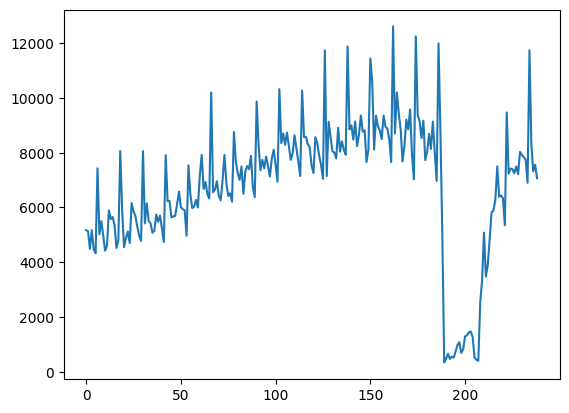

In [32]:
travel_data_ARR["P_Fam_Visas"].plot()

<Axes: >

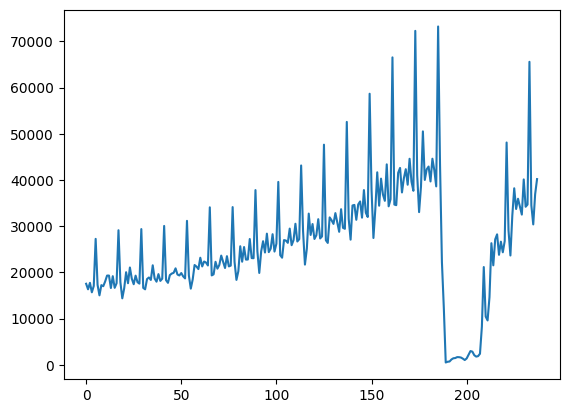

In [33]:
travel_data_DEP["Permanent Visas - Total"].plot()

This graph demonstrates the distribution of Permanent Visas throughout the Arrivals and Departures categories. It also shows the frequency of the number of visas. 

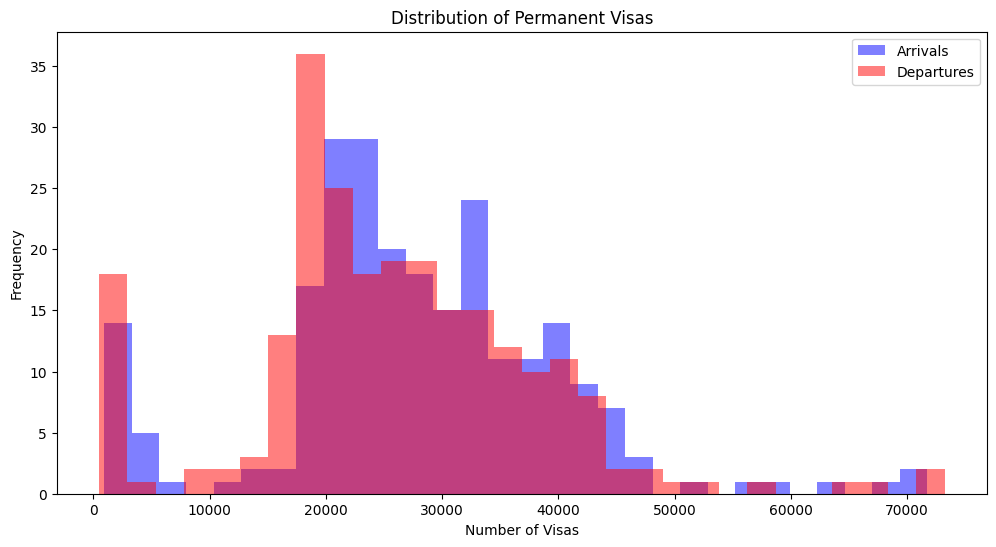

In [34]:
plt.figure(figsize=(12, 6))
travel_data_ARR['P_Visas_TOTAL'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Permanent Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Permanent Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

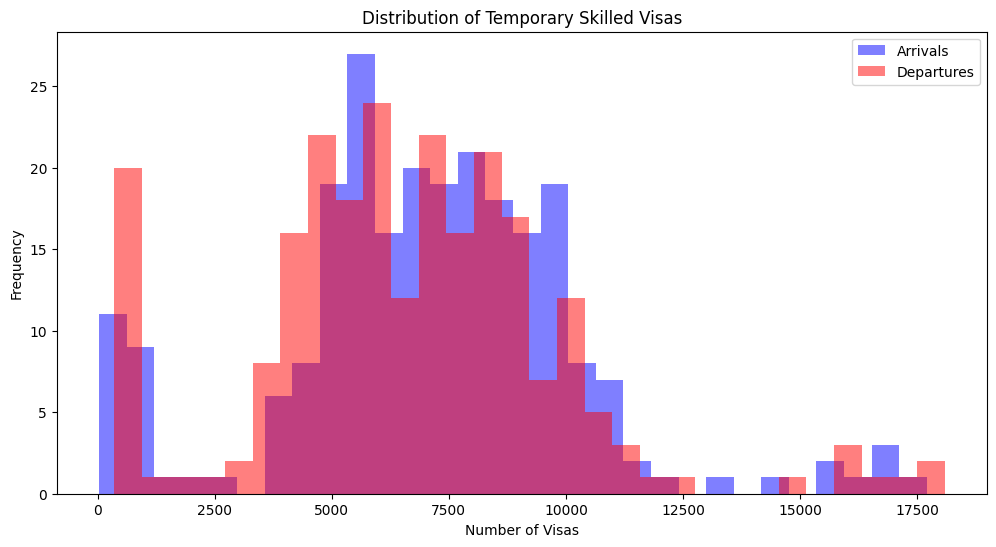

In [35]:
plt.figure(figsize=(12, 6))
travel_data_ARR['T_Skilled_Visas'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Temporary Skilled Visas'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Temporary Skilled Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

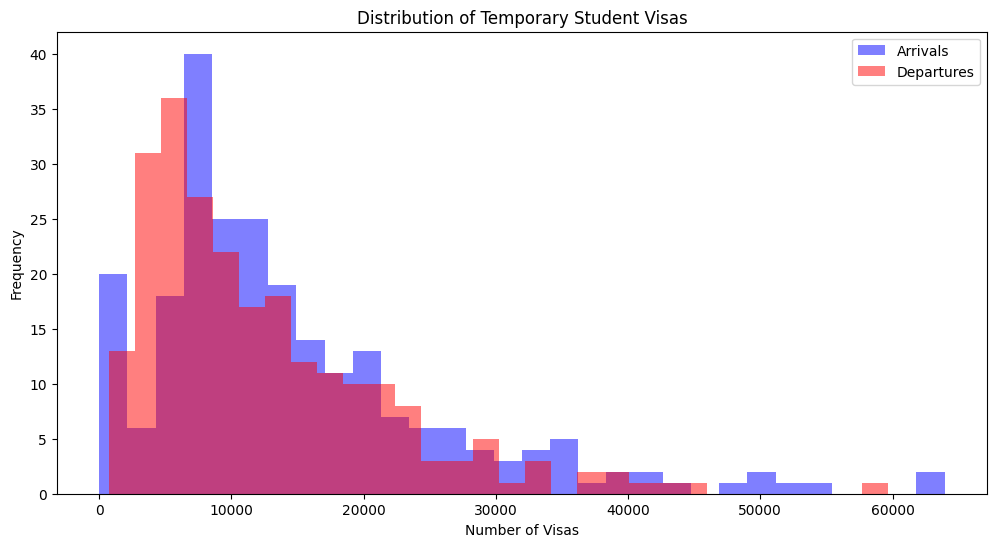

In [36]:
plt.figure(figsize=(12, 6))
travel_data_ARR['T_Student_Visas_TOTAL'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Temporary Student Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Temporary Student Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<Axes: >

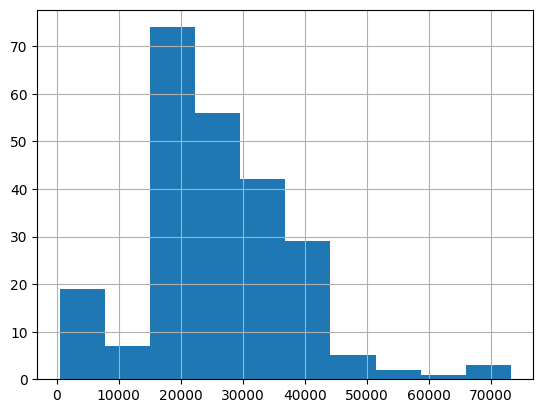

In [37]:
travel_data_DEP["Permanent Visas - Total"].hist()

<Axes: >

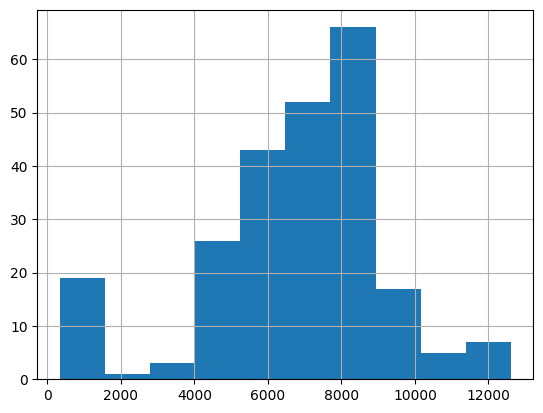

In [38]:
travel_data_ARR.P_Fam_Visas.hist()

# historgram collects bins and counts them 
# get handy when u do other things to it. (boolean values)
# create a list of booleans. if true then allows row through. 
# a list of true and falses.


<Axes: >

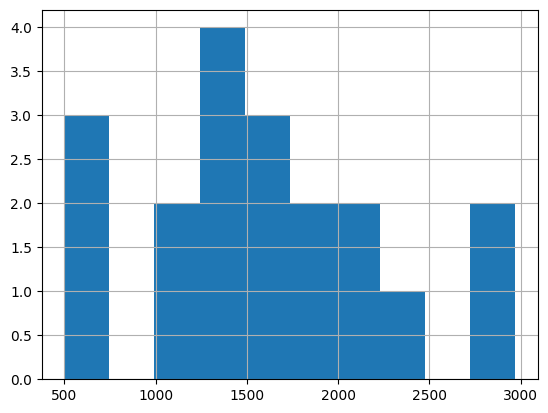

In [41]:
travel_data_DEP["Permanent Visas - Total"][travel_data_DEP["Permanent Visas - Total"] < 3000].hist()


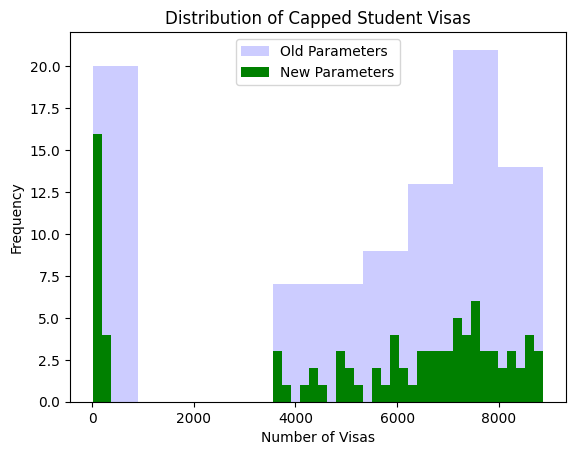

In [44]:
capped_Temp_Student_Visas_data = travel_data_ARR.T_Student_Visas_TOTAL[travel_data_ARR.T_Student_Visas_TOTAL < 9000]

# Plot histogram with old parameters
plt.hist(capped_Temp_Student_Visas_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Temp_Student_Visas_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Student Visas')
plt.legend()

# Display the plot
plt.show()

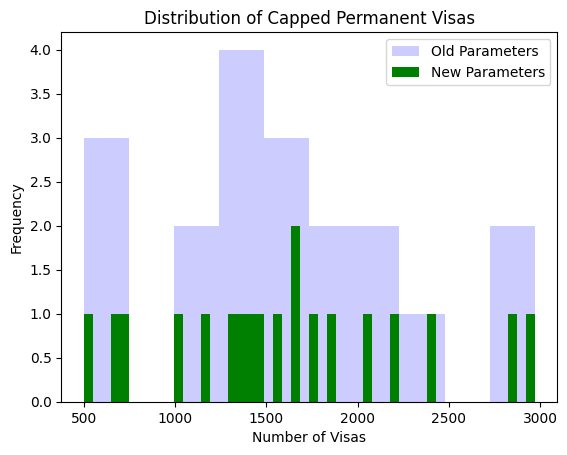

In [43]:
capped_Permanent_Visa_Totals_data = travel_data_DEP["Permanent Visas - Total"][travel_data_DEP["Permanent Visas - Total"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Permanent Visas')
plt.legend()

# Display the plot
plt.show()

In [ ]:
capped_Permanent_Visa_Totals_data = travel_data_DEP["Permanent Visas - Total"][travel_data_DEP["Permanent Visas - Total"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Permanent Visas')
plt.legend()

# Display the plot
plt.show()

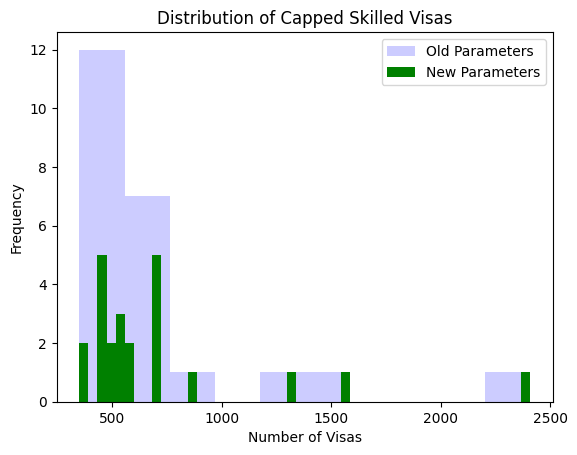

In [45]:
capped_Temp_Skilled_Visas_data = travel_data_DEP["Temporary Skilled Visas"][travel_data_DEP["Temporary Skilled Visas"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Temp_Skilled_Visas_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Temp_Skilled_Visas_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Skilled Visas')
plt.legend()

# Display the plot
plt.show()

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [72]:
ARR_DF = pd.read_excel(excel_file_path_ARR, sheet_name=None)

# Initialize an empty dictionary to store totals
totals = {}

# Iterate over each sheet
for sheet_name, df in ARR_DF.items():
    try:
        # Check if the column exists in the DataFrame
        if 'P_Fam_Visas' in df.columns:
            # Convert column to numeric (handles non-numeric data)
            df['P_Fam_Visas'] = pd.to_numeric(df['P_Fam_Visas'], errors='coerce')
            # Calculate the total number of permanent visas
            total_visas = df['P_Fam_Visas'].sum()
            # Store the result in the dictionary
            totals[sheet_name] = total_visas
        else:
            print(f"Column 'P_Fam_Visas' not found in sheet: {sheet_name}")
    except Exception as e:
        print(f"Error processing sheet {sheet_name}: {e}")

# Find the sheet with the highest total number of permanent visas
if totals:
    max_sheet = max(totals, key=totals.get)
    max_value = totals[max_sheet]
    print(f"Sheet with the highest number of permanent visas: {max_sheet}")
    print(f"Total number of permanent visas: {max_value}")
else:
    print("No valid data found.")

Column 'P_Fam_Visas' not found in sheet: Contents
Column 'P_Fam_Visas' not found in sheet: NSW
Column 'P_Fam_Visas' not found in sheet: VIC
Column 'P_Fam_Visas' not found in sheet: QLD
Column 'P_Fam_Visas' not found in sheet: SA
Column 'P_Fam_Visas' not found in sheet: WA
Column 'P_Fam_Visas' not found in sheet: TAS
Column 'P_Fam_Visas' not found in sheet: NT
Column 'P_Fam_Visas' not found in sheet: ACT
Column 'P_Fam_Visas' not found in sheet: Overall
No valid data found.


In [75]:
# Load the geographic data (replace with the path to your shapefile or GeoJSON)
shapefile_path = r"C:\Users\ameli\1161\travel_dataproject\AUS_2021_AUST_SHP_GDA2020.zip"
gdf = gpd.read_file(shapefile_path)

visa_dfs = pd.read_excel(excel_file_path_ARR, sheet_name=None)

# Create a DataFrame for visa data of interest
# Replace with the sheet name you want to use
visa_df = visa_dfs['NSW']  # Change 'Sheet1' to your specific sheet name

# 2. Prepare the Data

# Sample structure of your visa data
# Assume the relevant columns are: 'State/Territory', 'Latitude', 'Longitude', 'Size', 'Category'
# Ensure 'State/Territory' matches the column name in gdf and visa_df
visa_df['Size'] = pd.to_numeric(visa_df['Size'], errors='coerce')  # Convert to numeric, handle errors
visa_df['Latitude'] = pd.to_numeric(visa_df['Latitude'], errors='coerce')
visa_df['Longitude'] = pd.to_numeric(visa_df['Longitude'], errors='coerce')

# 3. Merge the Data (if needed)
# This step might not be necessary if your visa data does not need to be merged with geographic data

# 4. Plot the Map and Bubbles

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the map
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the bubbles
scatter = ax.scatter(
    visa_df['Longitude'],
    visa_df['Latitude'],
    s=visa_df['Size'],  # Bubble size
    alpha=0.5,
    c='blue',  # Bubble color
    edgecolor='black'
)

# Add labels
for i, row in visa_df.iterrows():
    ax.text(
        row['Longitude'],
        row['Latitude'],
        row['Category'],
        fontsize=12,
        ha='right',
        color='red'
    )

# Add titles and labels
ax.set_title('Bubble Chart on Map of Australia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

KeyError: 'Size'

In [35]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(30))
some_numbers.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [36]:
some_numbers[some_numbers < 20]
# 

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [37]:
some_numbers[(some_numbers < 6) | (some_numbers >= 10)]
# this needs the round brackets, not really sure why.
# 

0      0
1      1
2      2
3      3
4      4
5      5
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
dtype: int64

We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [41]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goltravel_dataish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

# pythons method of stacking items
# .pd turns them into a series
# create a pattern using a serie

pattern: [False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False]


7                   Chicken
8                Guinea pig
9                    Donkey
12        Western honey bee
16                   pigeon
19           Bactrian camel
22               guineafowl
32                   canary
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
36    Fancy rat and Lab rat
37                     mink
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [42]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about

# 

['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [43]:
[p for p in pets]

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goltravel_dataish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat and Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

In [92]:
[p for p in ARR_DF.column]

AttributeError: 'DataFrame' object has no attribute 'column'

This one converts the list to uppercase while it's doing the transfer

In [ ]:
[s.upper() for p in pets]

['DOG',
 'GOAT',
 'PIG',
 'SHEEP',
 'CATTLE',
 'ZEBU',
 'CAT',
 'CHICKEN',
 'GUINEA PIG',
 'DONKEY',
 'DUCK',
 'WATER BUFFALO',
 'WESTERN HONEY BEE',
 'DROMEDARY CAMEL',
 'HORSE',
 'SILKMOTH',
 'PIGEON',
 'GOOSE',
 'YAK',
 'BACTRIAN CAMEL',
 'LLAMA',
 'ALPACA',
 'GUINEAFOWL',
 'FERRET',
 'MUSCOVY DUCK',
 'BARBARY DOVE',
 'BALI CATTLE',
 'GAYAL',
 'TURKEY',
 'GOLDFISH',
 'RABBIT',
 'KOI',
 'CANARY',
 'SOCIETY FINCH',
 'FANCY MOUSE',
 'SIAMESE FIGHTING FISH',
 'FANCY RAT AND LAB RAT',
 'MINK',
 'RED FOX',
 'HEDGEHOG',
 'GUPPY']

In [7]:
[p.upper() for p in column]

NameError: name 'column' is not defined

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [ ]:
[p for p in pets if len(p) == 4]


['Goat', 'Zebu', 'duck', 'mink']

In [47]:
[p for p in column if len(p) == 13]

['P Other Visas', 'P Visas TOTAL', 'T Other Visas', 'T Visas TOTAL']

And this one is doing both

In [ ]:
[p.upper() for p in pets if len(p) == 5]


['SHEEP', 'HORSE', 'GOOSE', 'LLAMA', 'GAYAL', 'GUPPY']

In [48]:
[p.upper() for p in column if len(p) == 13]

['P OTHER VISAS', 'P VISAS TOTAL', 'T OTHER VISAS', 'T VISAS TOTAL']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Text(0.5, 1.0, 'Visa Ranging 50000')

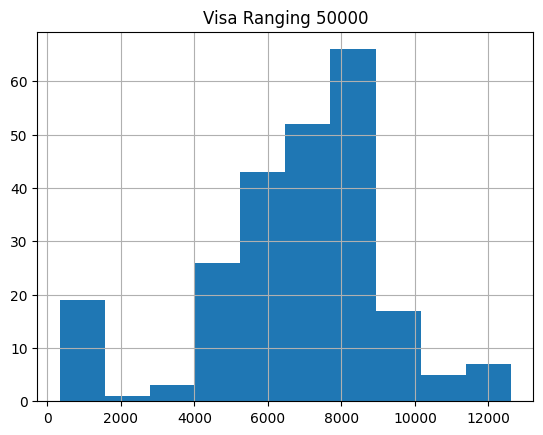

In [47]:
upper_bound = 50000
travel_data_ARR.P_Fam_Visas[travel_data_ARR.P_Fam_Visas < upper_bound].hist()
plt.title(f"Visa Ranging {upper_bound}")

Let's see what's under $1000

Text(0.5, 1.0, 'All fines under $1000')

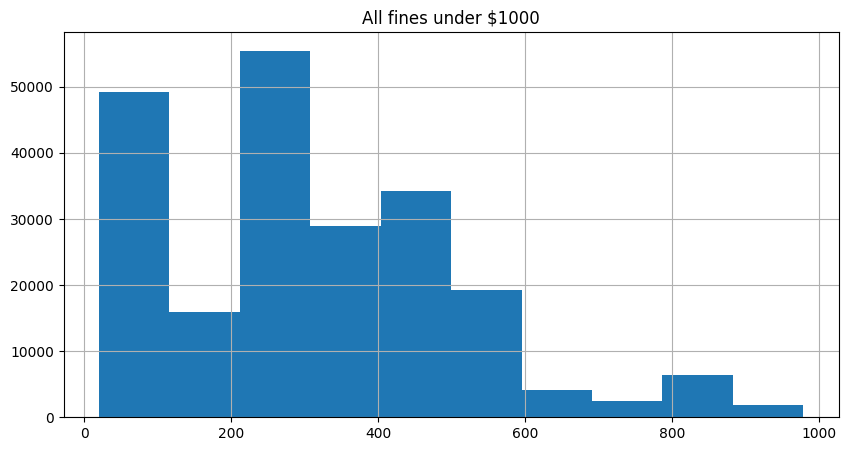

In [ ]:
upper_bound = 1000
penalty_data.P_Fam_Visas[penalty_data.P_Fam_Visas < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


Text(0.5, 1.0, 'Visa Ranging 20')

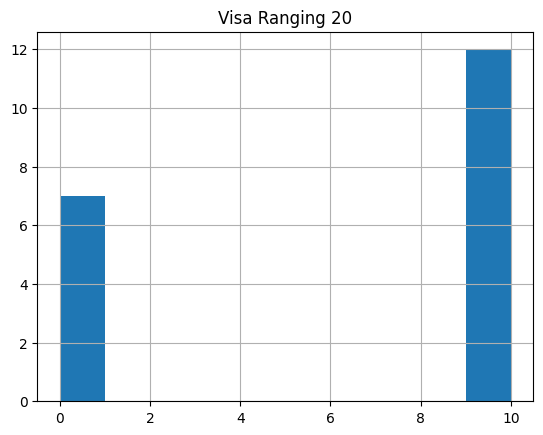

In [50]:
upper_bound = 20
travel_data_ARR.P_Fam_Visas[travel_data_ARR.P_Fam_Visas < upper_bound].hist()
plt.title(f"Visa Ranging {upper_bound}")

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [51]:
travel_data_ARR.head(2)


Month  Special_Category_Visa  P_Fam_Visas  P_Skilled_Visas  \
0 2004-07-01                  360.0         40.0             10.0   
1 2004-08-01                  280.0         40.0            110.0   

   P_Other_Visas  P_Visas_TOTAL  T_Student_Visas_HiEd  T_Student_Visas_VET  \
0          190.0          250.0                  40.0                 30.0   
1          270.0          420.0                  80.0                  0.0   

   T_Student_Visas_Schools  T_Student_Visas_INDP_ELICOS(f)  \
0                      0.0                             0.0   
1                      0.0                             0.0   

   T_Student_Visas_PGrad_Research  T_Student_Visas_Other_Students  \
0                            10.0                            20.0   
1                            10.0                            30.0   

   T_Student_Visas_TOTAL  T_Skilled_Visas  T_Visitor_Visas  T_Work_Visas  \
0                   90.0            100.0            810.0          30.0   
1                  120.0             50.0            980.0          10.0   

   T_Other_Visas  T_Visas_TOTAL  Other_Visas(g)  TOTAL(h)  
0          100.0         1130.0            10.0    5460.0  
1           30.0         1190.0            10.0    5790.0

We can see that `P_Fam_Visas` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [ ]:
penalty_data.LEGISLATION.value_counts()

# 

LEGISLATION
ROAD RULES 2008                                          103558
ROAD RULES 2014                                           88546
PASSENGER TRANSPORT REGULATION 2007                        4446
ROAD TRANSPORT (VEHICLE REGISTRATION) REGULATION 2007      4185
PROTECTION OF THE ENVIRONMENT OPERATIONS ACT 1997          3070
                                                          ...  
UNLAWFUL GAMBLING ACT 1998                                    1
NON-INDIGENOUS ANIMALS ACT 1987                               1
EXHIBITED ANIMALS PROTECTION ACT 1986                         1
COMMERCIAL AGENTS AND PRIVATE INQUIRY AGENTS ACT 2004         1
HEMP INDUSTRY ACT 2008                                        1
Name: count, Length: 211, dtype: int64

In [73]:
travel_data_ARR.P_Fam_Visas.value_counts()

P_Fam_Visas
7920.0    3
7660.0    3
7500.0    3
8290.0    3
7740.0    3
         ..
6520.0    1
6210.0    1
7010.0    1
6500.0    1
7070.0    1
Name: count, Length: 193, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<Axes: xlabel='LEGISLATION'>

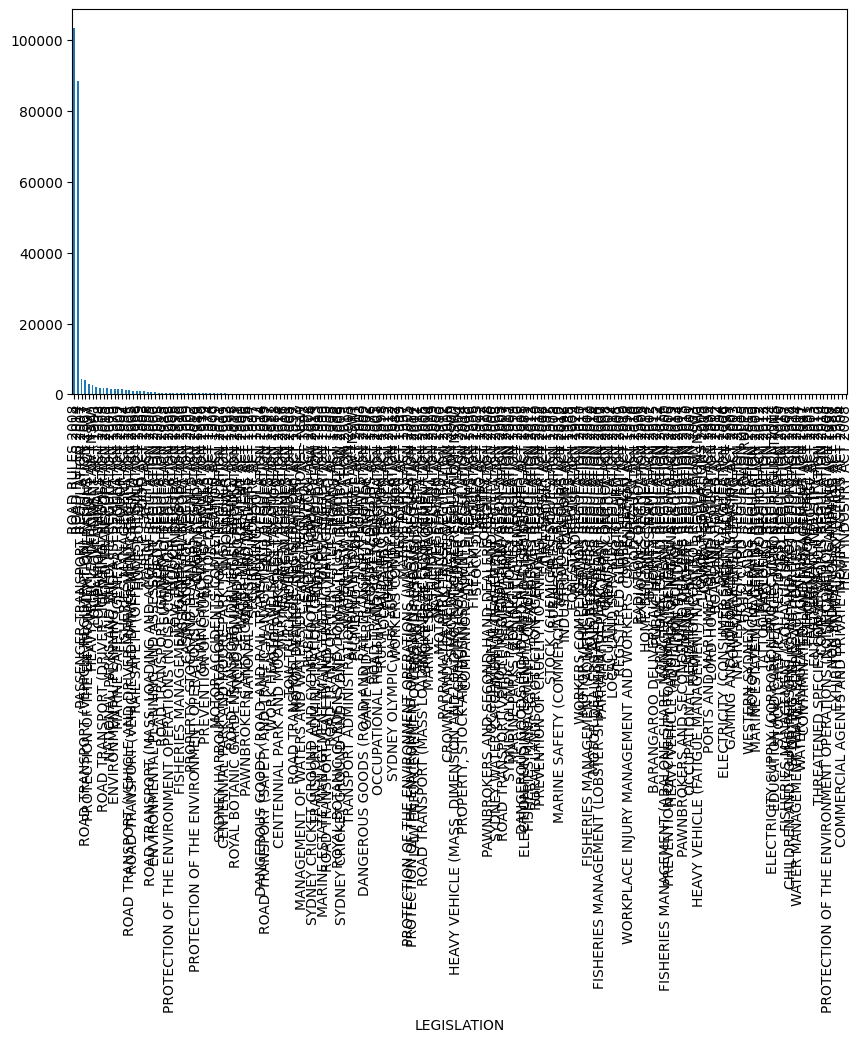

In [ ]:
pdvc = penalty_data.LEGISLATION.value_counts() # This makes a series
pdvc.plot(kind="bar")

In [3]:
pdvc = travel_data_ARR.P_Fam_Visas.value_counts() # This makes a series
pdvc.plot(kind="bar")

NameError: name 'travel_data_ARR' is not defined

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

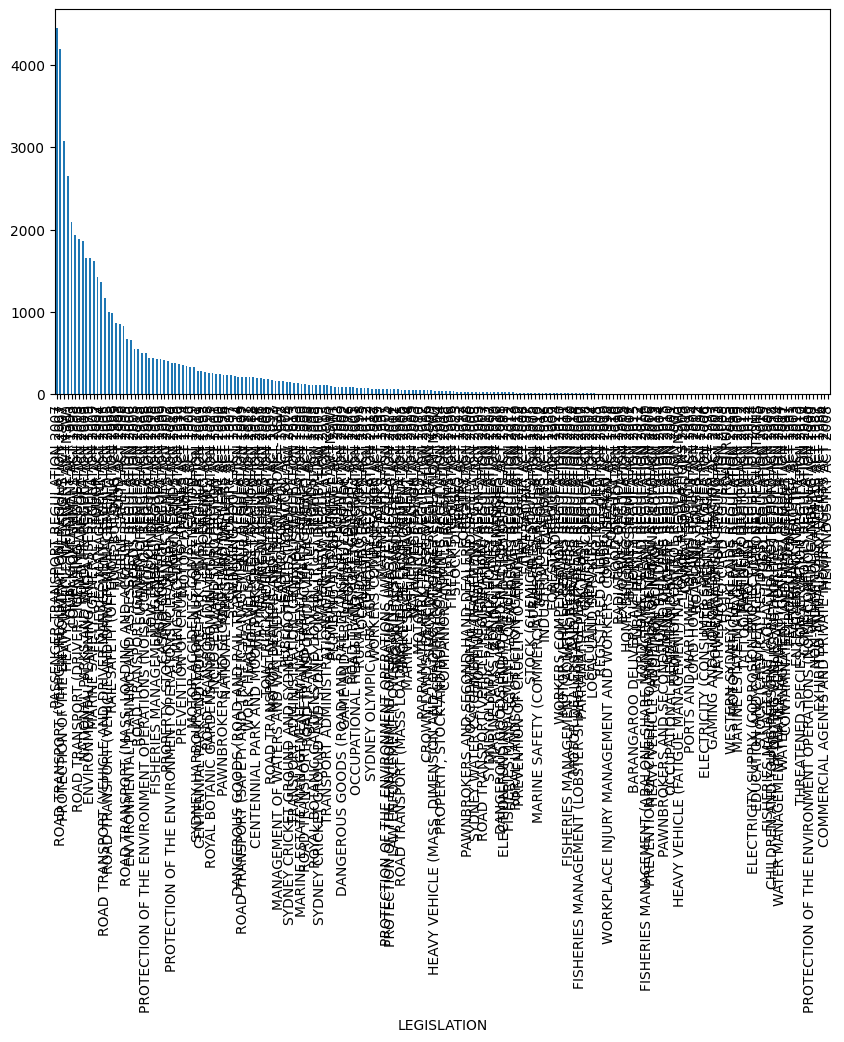

In [ ]:
pdvc = penalty_data.LEGISLATION.value_counts() 
pdvc[pdvc < 5000].plot(kind="bar");

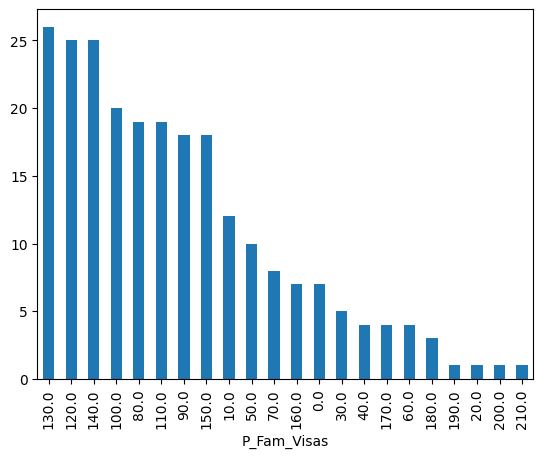

In [54]:
pdvc = travel_data_ARR.P_Fam_Visas.value_counts() 
pdvc[pdvc < 70].plot(kind="bar");

This pattern keeps repeating itself:

<Axes: xlabel='LEGISLATION'>

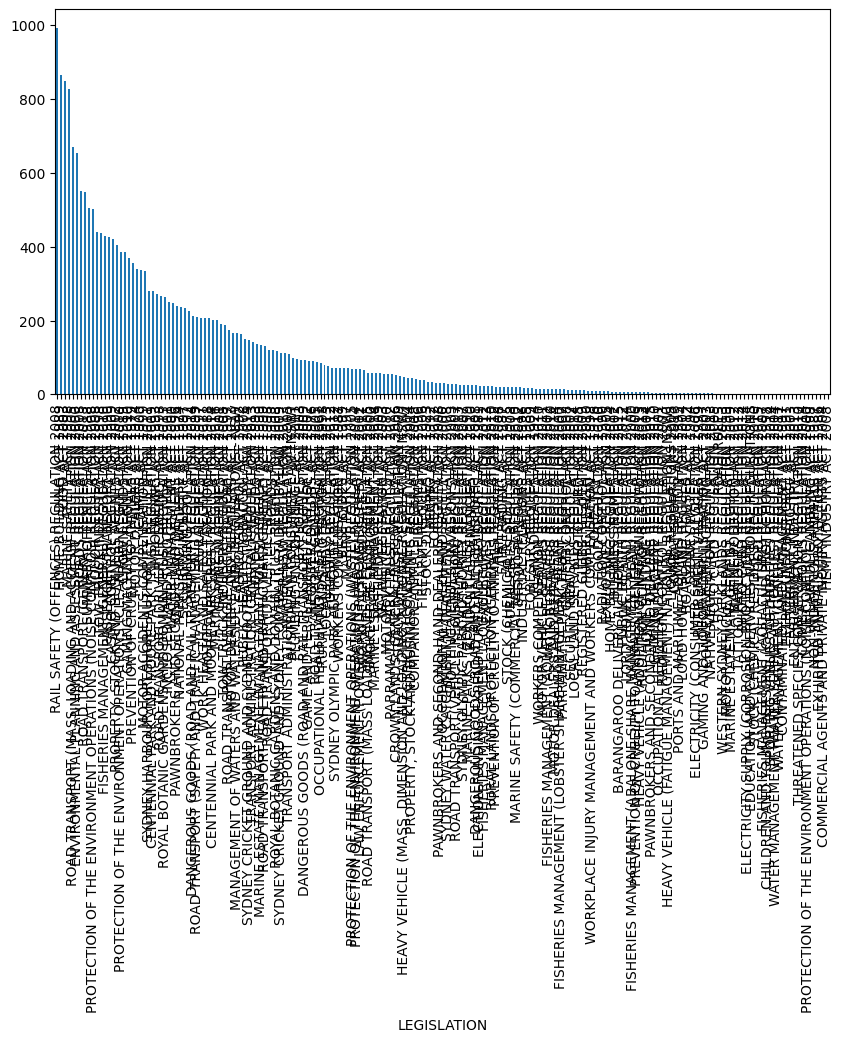

In [ ]:
pdvc[pdvc < 1000].plot(kind="bar")

In [4]:
pdvc[pdvc < 70].plot(kind="bar")

NameError: name 'pdvc' is not defined

<Axes: xlabel='LEGISLATION'>

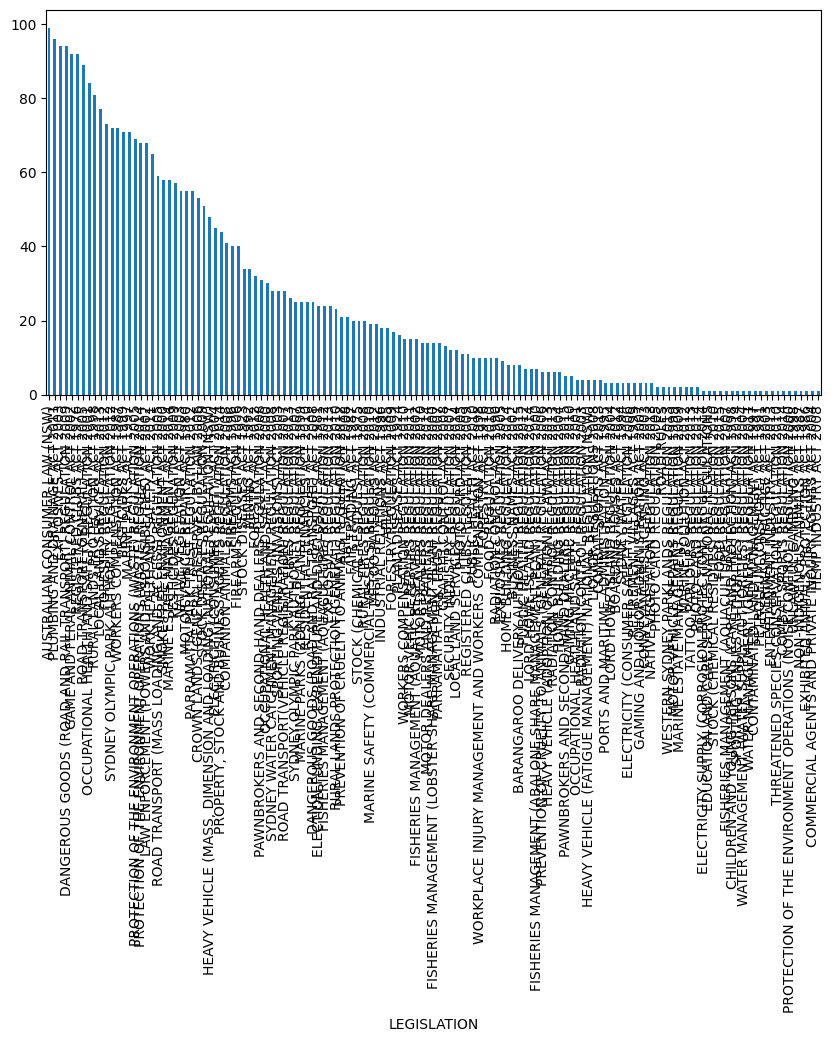

In [ ]:
pdvc[pdvc < 100].plot(kind="bar")

<Axes: xlabel='P_Fam_Visas'>

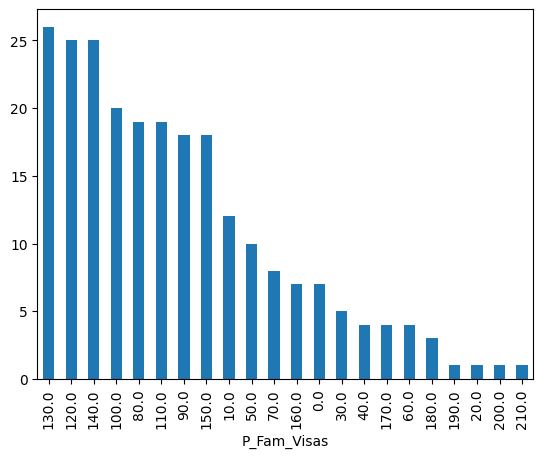

In [56]:
pdvc[pdvc < 40].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

<Axes: ylabel='LEGISLATION'>

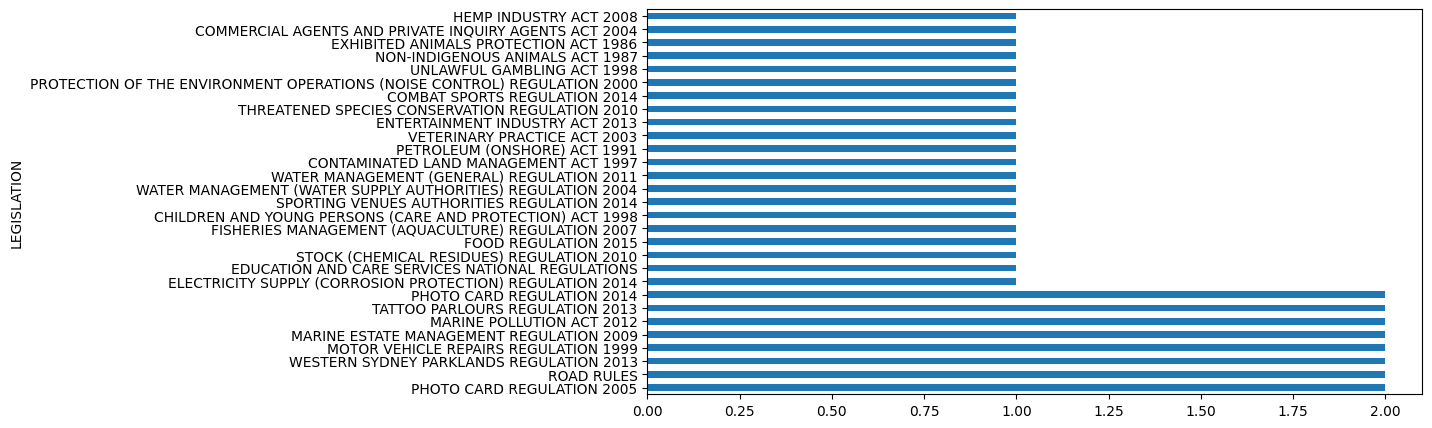

In [ ]:
pdvc[pdvc < 3].plot(kind="barh")

# barh the h at the end means horizontal 

<Axes: ylabel='P_Fam_Visas'>

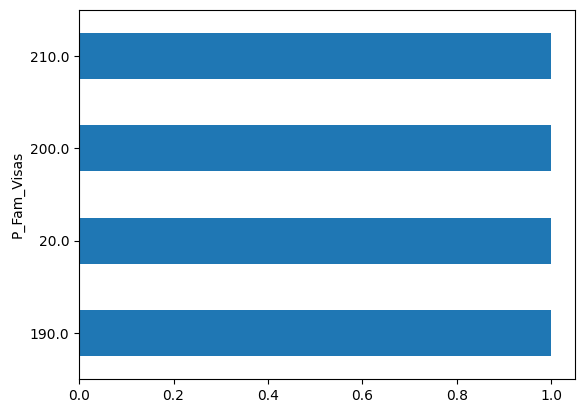

In [57]:
pdvc[pdvc < 3].plot(kind="barh")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [ ]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


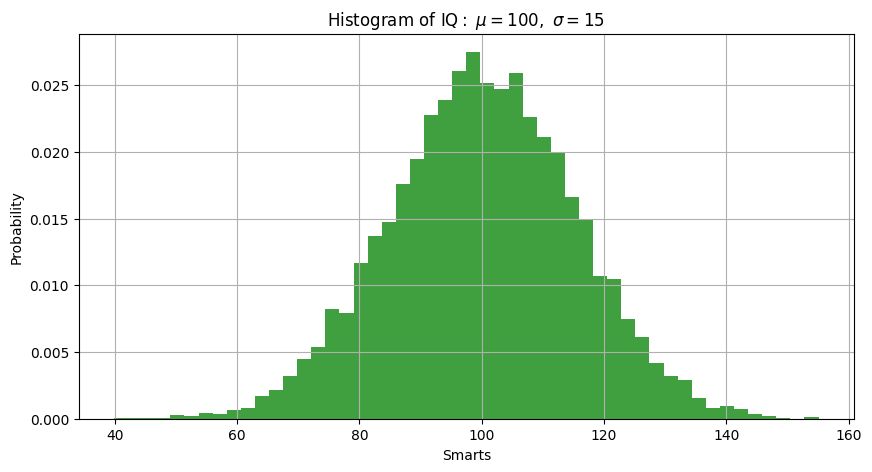

In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

<Axes: >

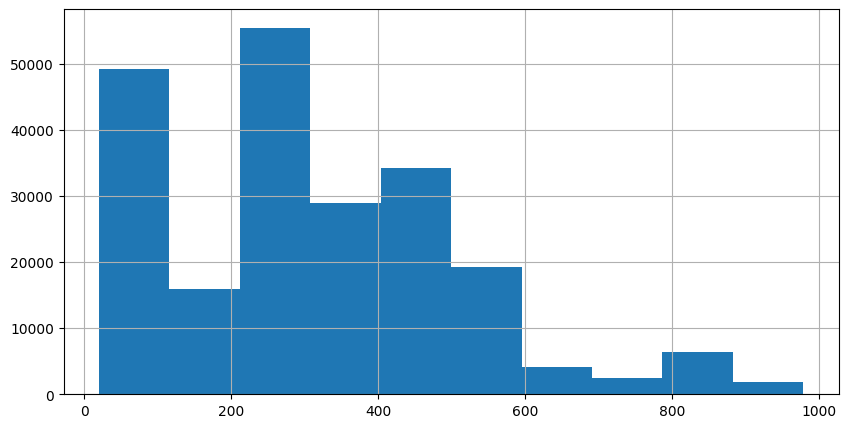

In [ ]:
penalty_data.P_Fam_Visas[penalty_data.LEGISLATION < 1000].hist()


<Axes: >

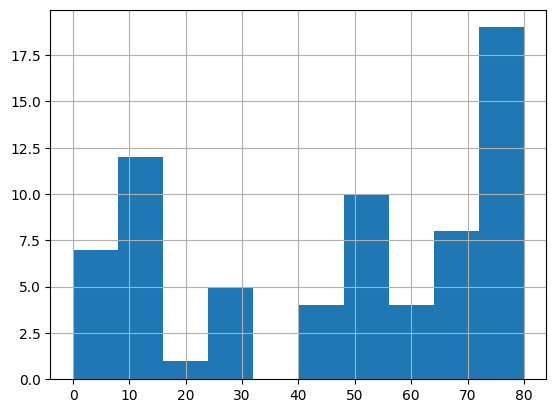

In [58]:
travel_data.P_Fam_Visas[travel_data.P_Fam_Visas <90].hist()

This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

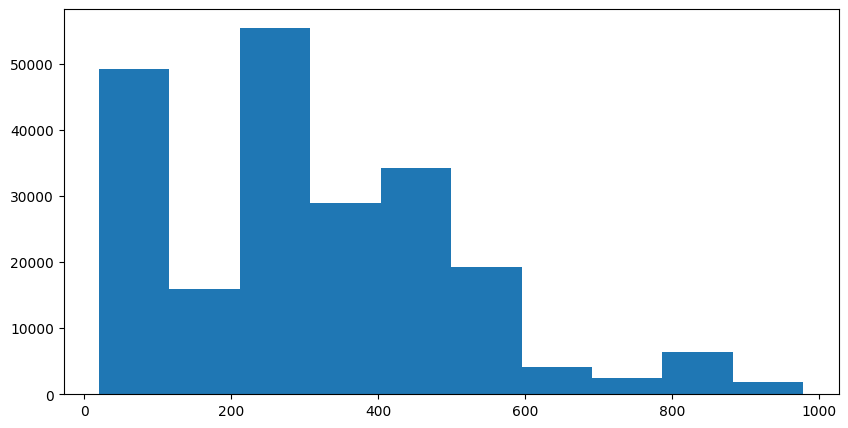

In [ ]:
capped_P_Fam_Visas_data = penalty_data.P_Fam_Visas[penalty_data.P_Fam_Visas < 1000]

plt.hist(capped_P_Fam_Visas_data)
plt.show()


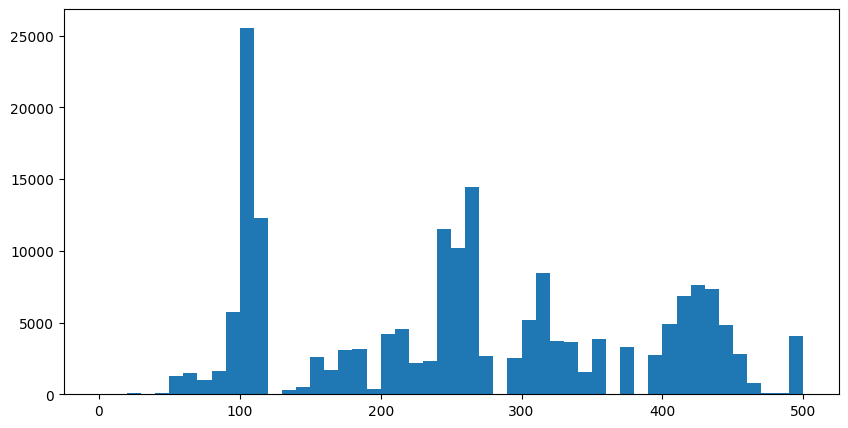

In [ ]:
plt.hist(penalty_data["LEGISLATIONS"], bins=50, range=(0, 500))
plt.show()

# ranging - different from the range function
# 

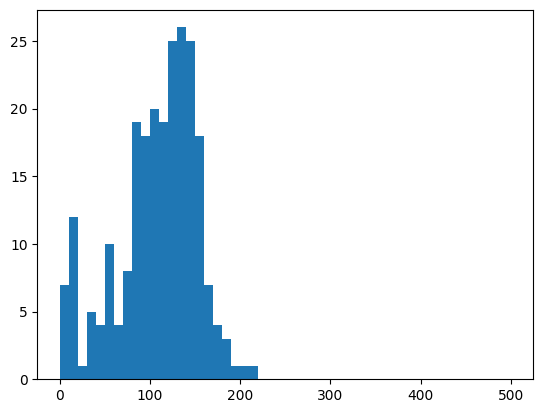

In [62]:
plt.hist(travel_data["P_Fam_Visas"], bins=50, range=(0, 500))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

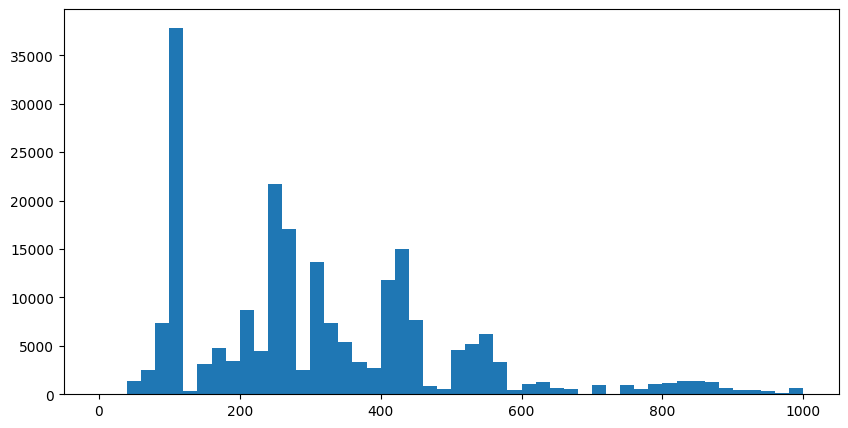

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    penalty_data.P_Fam_Visas,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()

# 

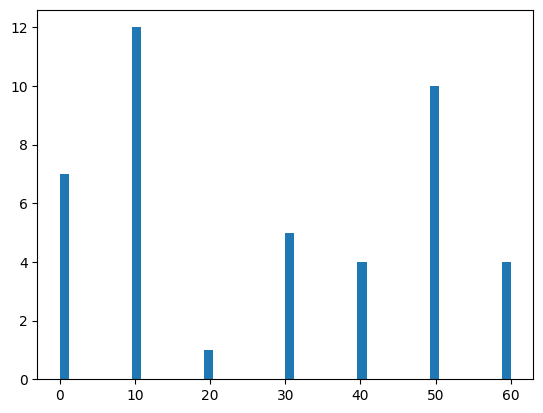

In [63]:
number_of_bins = 50
lower_bound = 0
upper_bound = 60
plt.hist(
    travel_data.P_Fam_Visas,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

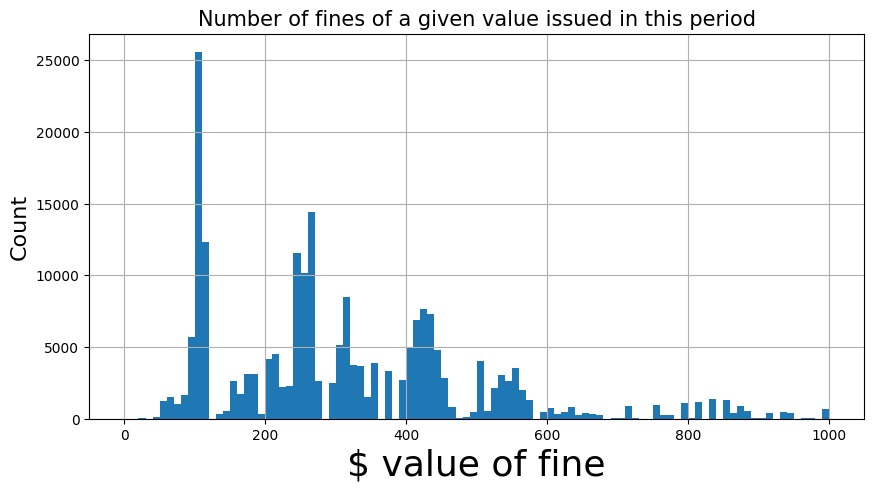

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data.P_Fam_Visas, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel("$ value of fine", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()

# plt means the plot wants a label, font size and grid. 


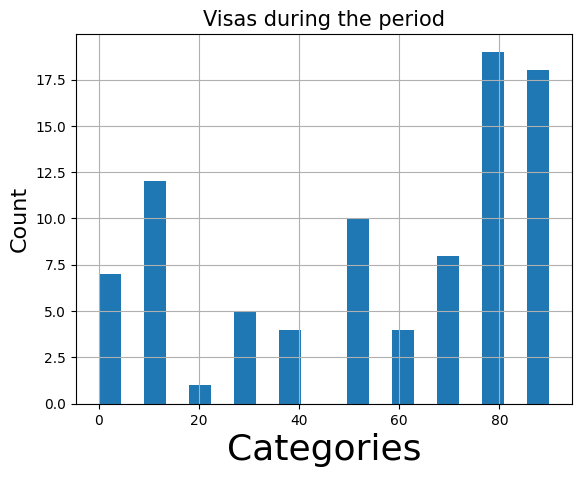

In [65]:
number_of_bins = 20
lower_bound = 0
upper_bound = 90

plt.hist(travel_data.P_Fam_Visas, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Visas during the period", fontsize=15)
plt.xlabel("Categories", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["OFFENCE_MONTH"],
    dayfirst=True,
)
penalty_data.head(2)

# if u call a colomun a date it will be a date 
# 

C:\Users\ameli\AppData\Local\Temp\ipykernel_9548\786856591.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  penalty_data = pd.read_csv(


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   
1       2011-2012    2011-07-01          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... RED_LIGHT_CAMERA_IND SPEED_CAMERA_IND SEATBELT_IND  \
0         7163.0  ...                    Y              NaN          NaN   
1            NaN  ...                  NaN              NaN          NaN   

  MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0              NaN         NaN      NaN      NaN                 NaN   
1              NaN           Y      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE  
0           46       16238  
1           78       20670  

[2 rows x 25 columns]

In [68]:
travel_data = pd.read_excel(
    filepath
        infer_datetime_format=True,
    parse_dates=["MONTH"],
    dayfirst=True,
)
travel_data.head(2)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2198242314.py, line 2)

This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
first_date = penalty_data.OFFENCE_MONTH.min()
last_date = penalty_data.OFFENCE_MONTH.max()
f"range is: {first_date} to {last_date}"

# strings are not orderable but dates can be ordered


'range is: 2011-07-01 00:00:00 to 2017-02-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

# SUper powerful if wanting to display dates
# 

'range is: July, 2011 to February, 2017'

Which means that we can put those values into our graph title:

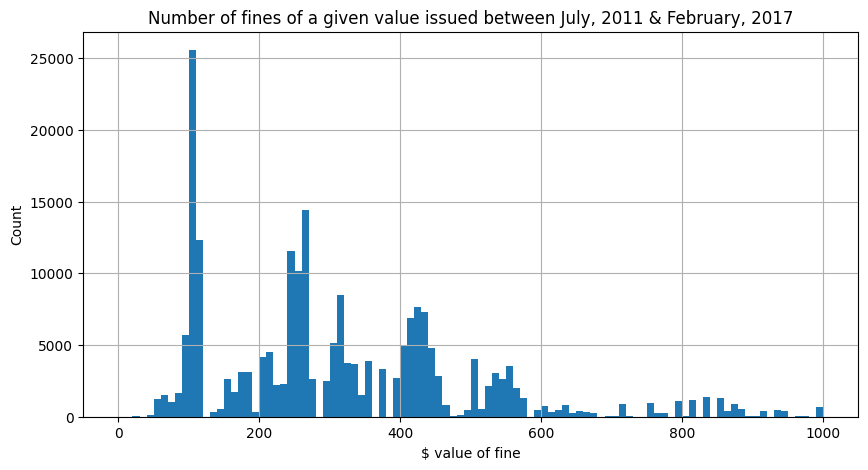

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    penalty_data["P_Fam_Visas"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of fines of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()

# adding more details as you add more information
# 

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

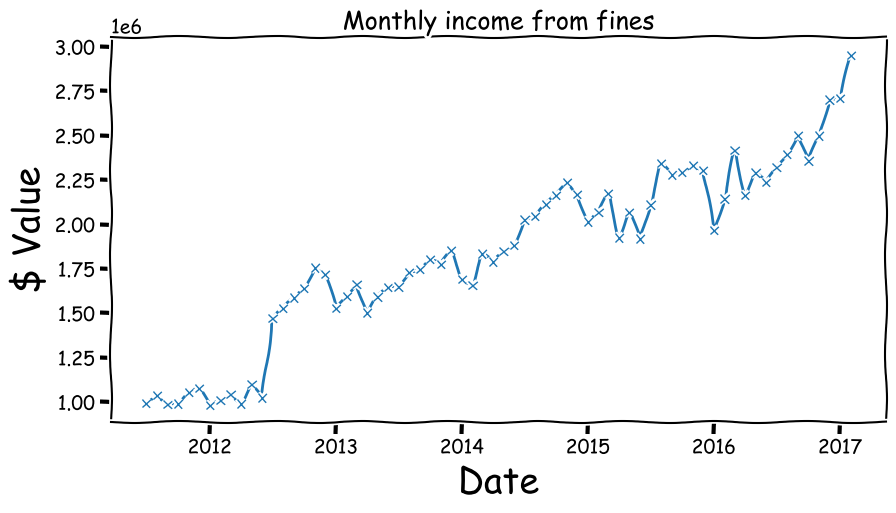

In [ ]:
income = penalty_data[["OFFENCE_MONTH", "P_Fam_Visas"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel("Date", fontsize=26)
plt.ylabel("$ Value", fontsize=26)
plt.grid(True)
plt.show()

# 

In [ ]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
# 

In [ ]:
ss = penalty_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)

#slicing lets u take a section of a list from somewhere to somewhere else. 
# Reversing list and tkaing the last value from the list. 
# lambda - tiny function that calls the day of the week. 
# lambda - is a small anonymous function. 
# 

C:\Users\ameli\AppData\Local\Temp\ipykernel_9548\1525795516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   
1       2011-2012    2011-07-01          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... SPEED_CAMERA_IND SEATBELT_IND MOBILE_PHONE_IND  \
0         7163.0  ...              NaN          NaN              NaN   
1            NaN  ...              NaN          NaN              NaN   

  PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE  \
0         NaN      NaN      NaN                 NaN           46       16238   
1           Y      NaN      NaN                 NaN           78       20670   

  day_from_lambda  
0               1  
1               1  

[2 rows x 26 columns]

Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)


C:\Users\ameli\AppData\Local\Temp\ipykernel_9548\3824094348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   

   LOCATION_CODE  ... SEATBELT_IND MOBILE_PHONE_IND PARKING_IND CINS_IND  \
0         7163.0  ...          NaN              NaN         NaN      NaN   

  FOOD_IND BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE day_from_lambda  \
0      NaN                 NaN           46       16238               1   

  day_from_function  
0                 1  

[1 rows x 27 columns]

Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)


C:\Users\ameli\AppData\Local\Temp\ipykernel_9548\2432571321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   

   LOCATION_CODE  ... MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND  \
0         7163.0  ...              NaN         NaN      NaN      NaN   

  BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE day_from_lambda  \
0                 NaN           46       16238               1   

  day_from_function nice_day  
0                 1   Friday  

[1 rows x 28 columns]

Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<Axes: xlabel='nice_day'>

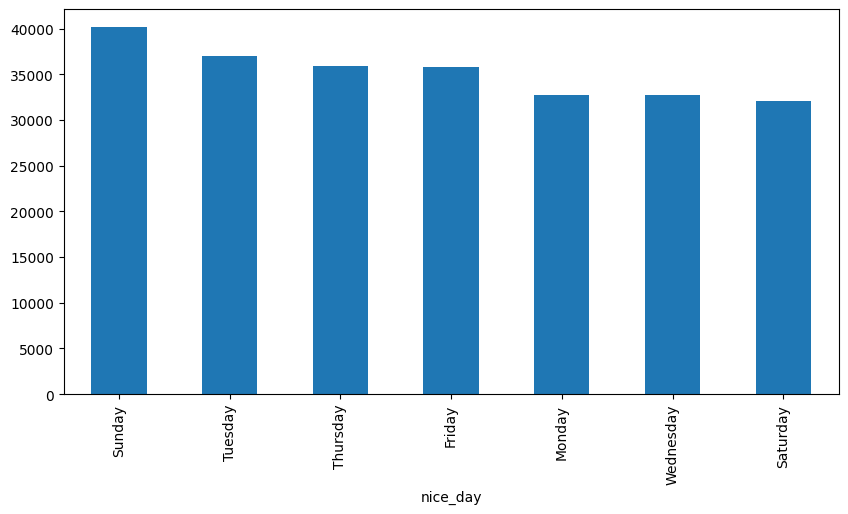

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")

# Does it in order of biggest to smallest number 
# Idealy wants to sort it by the day of the week
# 

And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))

# not something u can copy but something u can take on.
# folding will allow u to sat that these concepts are the same and clean it up for you. 
# using folding can fold those values so that the outputs are consistent. 
# 

uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_